## **1. Data Cleaning and UDF definitions**

###**1.1 Imported Libraries**

In [ ]:
## Importing Libraries
!pip install gensim
!pip install missingno
import pandas as pd
import numpy as np
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer

import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

#import OS package to interact with file paths/OS commands
import os
from sklearn.naive_bayes import GaussianNB
#import re package for the use of regular expressions
import re
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

import matplotlib.gridspec as gridspec
from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

import html

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 170 kB 8.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=6cda52afdaf911829fb7352e88dc1278a0a710d0b3e183ba943143afb06af1fa
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
     |████████████████████████████████| 173.5 MB 12 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


###**1.2 User defined functions**

In [ ]:
##This function takes in a tweet and removes the URLs adn return it
def remove_URLs(t):
    t = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", t)
    return t

In [ ]:
##This function takes in a tweet and removes the handles(@) and return it
def remove_thandle(t):
    t = " ".join(filter(lambda i:i[0]!='@', t.split()))
    return t

In [ ]:
##this function takes in a tweet adn replaces HTml character suhc as i.e and replaces it wiht eqivalaent ASCII codes using inbuilt unesape fucntion
def converttoascii(t):
    html.unescape(t)
    return t

In [ ]:
##this fuinciton take sina tweet and converts everything to lowercasse
def convertolower(t):
    t = t.lower()
    return t

In [ ]:
##this fuhnction helps to remove other characters from tweet
def elim_char(t):
    t = t.lstrip("b'")
    t = t.lstrip('b"')
    return t

In [ ]:
##this function helps to remove the punctuation marks fro the twwet
def elim_punct(t):    
    t  = "".join([i for i in t if i not in string.punctuation]) #removing punctuation marks
    t = re.sub('[0-9]+', '', t) #replacing all numbers by a ''
    t = re.sub(r'@[A-Za-z0-9]+','',t)
    t = re.sub(r'_[A-Za-z0-9]+','',t)
    t = re.sub(r'&[A-Za-z0-9]+','',t)
    t = re.sub(r'http[A-Za-z0-9]+','',t)
    return t

In [ ]:
##this function hepls to eliminate all the no ascii characters
def elim_nonascii(t):
    t = ''.join(i for i in t if ord(i) < 128)
    return t

Next function uses stemming. Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate”

**Source:** https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

In [ ]:
##A stemming algorithm reduces the words “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

##implementation of stemming words using NLTK: PorterStemmer
stemmer = nltk.PorterStemmer() 

##This function returns a stemmed tweet
def stemming(t):
    st = [stemmer.stem(w) for w in t]
    return st

Next function uses lemmatizer. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word

**Source:** https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [ ]:
##implementation of Lemmatizer using NLTK: WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.WordNetLemmatizer()

def lemma(t):
    lt = [lemmatizer.lemmatize(w) for w in t]
    return lt

In [ ]:
##This function helps to eli ate stop words suhc as the, a etc..
def elim_stopwords(t):
    stp_list = ' '
    token = RegexpTokenizer(r'\w+')         
    tt = token.tokenize(t)
    sw = nltk.corpus.stopwords.words('english')
    sw.extend(['ur', 'yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'yearold', 'fu', 
                     'week','day', 'b', 'xf', 'n', 'rt', 'amp', 'xf0', 'x9f', 'x87', 'xa8', 'xa6', 'xa8', 'xe2', 'x80', 'x9ci', 
                     'x9d', 'x99s', 'x99t', 'x9cthe'])
    sw.extend(extra_stop_words)
    sw = list(set(sw))
        
    # Eliminate stopwords
    tostop = [w for w in tt if w not in sw] 
    t_wnostopwords = stp_list.join(tostop)
    return t_wnostopwords

In [ ]:
##Input a tweet to remove unwanted character combinations
def diff_t(t):
    t = t.replace('\n', r'') 
    t = t.replace('\n\n', r'')   
    t = t.replace('\\n\\n', r'')    
    t = t.replace('\\n', r'')    
    t = t.replace('\xe2\x80\x99', r'')
    t = t.replace('\\xe2\\x80\\x99', r'')
    t = t.replace('\\xe2\\x80\\x98', r'')
    t = t.replace('\\xe2\\x80\\x99', r'')    
    t = t.replace('\xe2\x80\x98', r'')    
    t = t.replace('\xe2\x80\x9c', r'')    
    t = t.replace('\xe2\x80\x9d', r'')    
    t = t.replace('\xe2\x80\x9e', r'')    
    t = t.replace('\xe2\x80\x9f', r'')    
    t = t.replace('\xe2\x80\x9c', r'') 
    t = t.replace('\xe2\x80\x98', r'') 
    t = t.replace('\xe2\x80\xb2', r'') 
    t = t.replace('\xe2\x80\x9b', r'') 
    t = t.replace('\xe2\x80\xb3', r'') 
    t = t.replace('\xe2\x80\xb4', r'') 
    t = t.replace('\xe2\x80\xb5', r'') 
    t = t.replace('\xe2\x80\xb6', r'') 
    t = t.replace('\xe2\x80\xb7', r'')  
    t = t.replace('\xe2\x81\xbb', r'')  
    t = t.replace('\xe2\x81\xbd', r'')  
    t = t.replace('\xe2\x81\xbe', r'')  
    t = t.replace('\\xe2\\x98\\xb9\\xef\\xb8\\x8f', r'')  
    t = t.replace('\\xf0\\x9f\\xa7\\xa1\\xf0\\x9f\\xa7\\xa1', r'')  
    t = t.replace('\\xf0\\x9f\\x87\\xa8\\xf0\\x9f\\x87\\xa6', r'')  
    t = t.replace('\\xf0\\x9f\\xa4\\xa6\\xe2\\x80\\x8d\\xe2\\x99\\x82\\xef\\xb8\\x8f', r'')  
    t = t.replace('\\xf0\\x9f\\x90\\x8e', r'')  
    t = t.replace('\\xf0\\x9f\\x90\\x8e', r'')  
    t = t.replace('\\xc2\\xa0', r'')  
    t = t.replace('\\xf0\\x9f\\x98\\x8b', r'')  
    t = t.replace('\\xe2\\x9d\\x93', r'')  
    t = t.replace('\\xe2\\x9d\\x93', r'')  
    t = t.replace('\\xf0\\x9f\\xa7\\xa1\\xf0\\x9f\\xa7\\xa1', r'')
    t = t.replace('\\xe2\\x9e\\xa1\\xef\\xb8\\x8f', r'')
    t = t.replace('\\xf0\\x9f\\x98\\x8f', r'')
    t = t.replace('\\xf0\\x9f\\x87\\xa8\\xf0\\x9f\\x87\\xa6', r'')
    t = t.replace('\\xf0\\x9f\\x92\\x81\\xf0\\x9f\\x99\\x8a\\xf0\\x9f\\x8d\\xbb', r'')
    t = t.replace('\\xf0\\x9f\\x8f\\xbc', r'')
    return t

In [ ]:
#this function detokenize a tweet
def detokenize(t):
    s_list = ' '
    dt = s_list.join(t)
    return dt

In [ ]:
##This function executes logistic regression with hyperparameter tunining with grid search
def logisticreg(X, y, test_size=0.3, param = {'C':[0.01,0.05,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=5):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=1624, stratify=y)
    reg_model = LogisticRegression()
    reg_model_gridsearch = GridSearchCV(reg_model, param, cv=cv, verbose=0, scoring='accuracy')
    reg_model_gridsearch_lr = reg_model_gridsearch.fit(X_train, y_train)
    reg_pred = reg_model_gridsearch_lr.predict(X_test)
    reg_report = classification_report(y_test,reg_pred)
    reg_acc = accuracy_score(y_test, reg_pred)
    reg_confusion = confusion_matrix(y_test, reg_pred)
    reg_f1_score = f1_score(y_test, reg_pred, average='weighted')
    reg_model_gridsearch_bs = reg_model_gridsearch.best_score_
    reg_model_gridsearch_bp = reg_model_gridsearch.best_params_
    return reg_report, reg_acc, reg_confusion, reg_f1_score, reg_model_gridsearch_lr.predict(X), reg_model_gridsearch_bs, reg_model_gridsearch_bp

In [ ]:
##this function us Knn Classifier with hyperparameter tunining with grid search
def knnclassifier(X, y, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=1624, stratify=y)
    Knn_model = KNeighborsClassifier()
    Knn_model_gridsearch = GridSearchCV(Knn_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train, y_train)
    Knn_model_pred = Knn_model_gridsearch.predict(X_test)
    Knn_report = classification_report(y_train, Knn_model_pred)
    Knn_acc = accuracy_score(y_test, Knn_model_pred)
    Knn_confusion = confusion_matrix(y_test, Knn_model_pred)
    Knn_f1_score = f1_score(y_test, Knn_model_pred, average='weighted')
    Knn_model_gridsearch_bs = Knn_model_gridsearch.best_score_
    Knn_model_gridsearch_bp = Knn_model_gridsearch.best_params_
    return Knn_report, Knn_acc, Knn_confusion, Knn_f1_score, Knn_model_gridsearch.predict(X), Knn_model_gridsearch_bs, Knn_model_gridsearch_bp

In [ ]:
##This function executes naive bayes classification 
##(Note:hyperparameter tuning cannot be performed )####
def naivebayesclass(X, y, alpha=1.0, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=1624, stratify=y)
    naive_bayes_classification_model = MultinomialNB(alpha=alpha)
    naive_bayes_classification_model.fit(X_train,y_train)
    naive_bayes_classification_model_pred = naive_bayes_classification_model.predict(X_test)
    naive_bayes_classification_report = classification_report(y_test, naive_bayes_classification_model_pred)
    naive_bayes_classification_acc = accuracy_score(y_test, naive_bayes_classification_model_pred)
    naive_bayes_classification_confusion = confusion_matrix(y_test, naive_bayes_classification_model_pred)
    naive_bayes_classification_f1_score = f1_score(y_test, naive_bayes_classification_model_pred, average='weighted') 
    return naive_bayes_classification_report, naive_bayes_classification_acc, naive_bayes_classification_confusion, naive_bayes_classification_f1_score, naive_bayes_classification_model.predict(X)

In [ ]:
##This function executes linear SVC classification using SVM with hyperparameter tuning with gridsearch
def linearsvc(X, y, param = {'C':[0.01,0.05,0.1,0.5,0.2,1]}, cv = 5, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=1624, stratify=y)
    l_svc_model = LinearSVC()
    l_svc_model_gridsearch = GridSearchCV(l_svc_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train, y_train)
    l_svc_model_pred = l_svc_model_gridsearch.predict(X_test)
    l_svc_report = classification_report(y_test, l_svc_model_pred)
    l_svc_acc = accuracy_score(y_test, l_svc_model_pred)
    l_svc_confusion = confusion_matrix(y_test, l_svc_model_pred)
    l_svc_f1_score = f1_score(y_test, l_svc_model_pred, average='weighted') 
    l_svc_model_gridsearch_bs = l_svc_model_gridsearch.best_score_
    l_svc_model_gridsearch_bp = l_svc_model_gridsearch.best_params_
    return l_svc_report, l_svc_acc, l_svc_confusion, l_svc_f1_score, l_svc_model_gridsearch.predict(X), l_svc_model_gridsearch_bs,l_svc_model_gridsearch_bp

In [ ]:
##This function executes decision tree classification with hyperparameter tuning with gridsearch
def decisiontrees(X, y, param = {'criterion':['gini', 'entropy']}, cv=5, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=1624, stratify=y)
    dt_model = DecisionTreeClassifier()
    dt_model_gridsearch = GridSearchCV(dt_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train, y_train)
    dt_model_pred = dt_model_gridsearch.predict(X_test)
    dt_report = classification_report(y_test, dt_model_pred)
    dt_acc = accuracy_score(y_test, dt_model_pred)
    dt_confusion = confusion_matrix(y_test, dt_model_pred)
    dt_f1_score = f1_score(y_test, dt_model_pred, average='weighted') 
    dt_model_gridsearch_bs = dt_model_gridsearch.best_score_
    dt_model_gridsearch_bp = dt_model_gridsearch.best_params_
    return dt_report, dt_acc, dt_confusion, dt_f1_score, dt_model_gridsearch.predict(X),dt_model_gridsearch_bs,dt_model_gridsearch_bp


In [ ]:
##This function exectutes random forest classification with hyperparameter tuning with gridsearch
def randomforest(X, y, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100, 200]}, cv = 5, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=1624, stratify=y)
    rf_model = RandomForestClassifier(random_state=1624)
    rf_model_gridsearch = GridSearchCV(rf_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train, y_train)
    rf_model_pred = rf_model_gridsearch.predict(X_test)  
    rf_report = classification_report(y_test, rf_model_pred)
    rf_acc = accuracy_score(y_test, rf_model_pred)
    rf_confusion = confusion_matrix(y_test, rf_model_pred)
    rf_f1_score = f1_score(y_test, rf_model_pred, average='weighted') 
    rf_model_gridsearch_bs = rf_model_gridsearch.best_score_
    rf_model_gridsearch_bp = rf_model_gridsearch.best_params_
    return rf_report, rf_acc, rf_confusion, rf_f1_score, rf_model_gridsearch.predict(X), rf_model_gridsearch_bs,rf_model_gridsearch_bp


In [ ]:
##This function executes XG boost classification based on parallel tree boosting with hyperparameter tuning with gridsearch
def XGBoost(X, y, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 5, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=1624, stratify=y)
    xg_model = XGBClassifier(random_state=1624)
    xg_model_gridsearch = GridSearchCV(xg_model, param, cv=cv, verbose=0, scoring='accuracy').fit(X_train, y_train)
    xg_model_pred = xg_model_gridsearch.predict(X_test)
    xg_model_report = classification_report(y_test, xg_model_pred)
    xg_model_acc = accuracy_score(y_test, xg_model_pred)
    xg_model_confusion = confusion_matrix(y_test, xg_model_pred)
    xg_model_f1_score = f1_score(y_test, xg_model_pred, average='weighted') 
    xg_model_gridsearch_bs = xg_model_gridsearch.best_score_
    xg_model_gridsearch_bp = xg_model_gridsearch.best_params_
    return xg_model_report, xg_model_acc, xg_model_confusion, xg_model_f1_score, xg_model_gridsearch.predict(X), xg_model_gridsearch_bs,xg_model_gridsearch_bp

In [ ]:
##This function helps to sum and avergae all the vecotized words from a tweet
def vector_maker(t, s):
    vector = np.zeros(s).reshape((1, size))
    c = 0.
    if t == '':
        return vector
    else:
        t = t.split(' ')
        for w in t:
            vector += model_word2vec[w].reshape((1, s))
            c += 1.
    if c != 0:
        vector /= c
    return vector

###**1.3 Data Preperation and Cleaning**

In [ ]:
#### Downloading the sentiments dataset -------------------------------------------------------
df_senti = pd.read_csv('sentiment_analysis.csv')
df = df_senti.copy() # creating a copy of the dataframe

#### Downloading the election 2019 dataset -------------------------------------------------------
df_canadian = pd.read_csv('Canadian_elections_2021.csv')
df_elec = df_canadian.copy() # creating a copy of the dataframe
# print(df_elec.shape)

In [ ]:
##defining the stop words
extra_stop_words = ['a','able','about','above','abst','accordance','according','accordingly','across','act','actually','added','adj','affected','affecting',
 'affects','after','afterwards','again','against','ah','all','almost','alone','along','already','also','although','always','am','among',
 'amongst','an','and','announce','another','any','anybody','anyhow','anymore','anyone','anything','anyway','anyways','anywhere','apparently',
 'approximately','are','aren','arent','arise','around','as','aside','ask','asking','at','auth','available','away','awfully','b','back','be',
 'became','because','become','becomes','becoming','been','before','beforehand','begin','beginning','beginnings','begins','behind','being',
 'believe','below','beside','besides','between','beyond','biol','both','brief','briefly','but','by','c','ca','came','can','cannot',"can't",
 'cause','causes','certain','certainly','co','com','come','comes','contain','containing','contains','could','couldnt','d','date','did',
 "didn't",'different','do','does',"doesn't",'doing','done',"don't",'down','downwards','due','during','e','each','ed','edu','effect','eg',
 'eight','eighty','either','else','elsewhere','end','ending','enough','especially','et','et-al','etc','even','ever','every','everybody',
 'everyone','everything','everywhere','ex','except','f','far','few','ff','fifth','first','five','fix','followed','following','follows','for',
 'former','formerly','forth','found','four','from','further','furthermore','g','gave','get','gets','getting','give','given','gives','giving',
 'go','goes','gone','got','gotten','h','had','happens','hardly','has',"hasn't",'have',"haven't",'having','he','hed','hence','her','here',
 'hereafter','hereby','herein','heres','hereupon','hers','herself','hes','hi','hid','him','himself','his','hither','home','how','howbeit',
 'however','hundred','i','id','ie','if',"i'll",'im','immediate','immediately','importance','important','in','inc','indeed','index','information',
 'instead','into','invention','inward','is',"isn't",'it','itd',"it'll",'its','itself',"i've",'j','just','k','keep\tkeeps','kept','kg','km','know',
 'known','knows','l','largely','last','lately','later','latter','latterly','least','less','lest','let','lets','like','liked','likely','line','little',
 "'ll",'look','looking','looks','ltd','m','made','mainly','make','makes','many','may','maybe','me','mean','means','meantime','meanwhile','merely','mg',
 'might','million','miss','ml','more','moreover','most','mostly','mr','mrs','much','mug','must','my','myself','n','na','name','namely','nay','nd','near',
 'nearly','necessarily','necessary','need','needs','neither','never','nevertheless','new','next','nine','ninety','no','nobody','non','none','nonetheless',
 'noone','nor','normally','nos','not','noted','nothing','now','nowhere','o','obtain','obtained','obviously','of','off','often','oh','ok','okay','old','omitted',
 'on','once','one','ones','only','onto','or','ord','other','others','otherwise','ought','our','ours','ourselves','out','outside','over','overall','owing','own',
 'p','page','pages','part','particular','particularly','past','per','perhaps','placed','please','plus','poorly','possible','possibly','potentially','pp','predominantly',
 'present','previously','primarily','probably','promptly','proud','provides','put','q','que','quickly','quite','qv','r','ran','rather','rd','re','readily','really','recent',
 'recently','ref','refs','regarding','regardless','regards','related','relatively','research','respectively','resulted','resulting','results','right','run','s','said','same',
 'saw','say','saying','says','sec','section','see','seeing','seem','seemed','seeming','seems','seen','self','selves','sent','seven','several','shall','she','shed',"she'll",'shes',
 'should',"shouldn't",'show','showed','shown','showns','shows','significant','significantly','similar','similarly','since','six','slightly','so','some','somebody','somehow','someone',
 'somethan','something','sometime','sometimes','somewhat','somewhere','soon','sorry','specifically','specified','specify','specifying','still','stop','strongly','sub','substantially',
 'successfully','such','sufficiently','suggest','sup','sure\tt','take','taken','taking','tell','tends','th','than','thank','thanks','thanx','that',"that'll",'thats',"that've",'the','their',
 'theirs','them','themselves','then','thence','there','thereafter','thereby','thered','therefore','therein',"there'll",'thereof','therere','theres','thereto','thereupon',"there've",'these','they',
 'theyd',"they'll",'theyre',"they've",'think','this','those','thou','though','thoughh','thousand','throug','through','throughout','thru','thus','til','tip','to','together','too','took','toward','towards',
 'tried','tries','truly','try','trying','ts','twice','two','u','un','under','unfortunately','unless','unlike','unlikely','until','unto','up','upon','ups','us','use','used','useful','usefully','usefulness',
 'uses','using','usually','v','value','various',"'ve",'very','via','viz','vol','vols','vs','w','want','wants','was','wasnt','way','we','wed','welcome',"we'll",'went','were','werent',"we've",'what','whatever',
 "what'll",'whats','when','whence','whenever','where','whereafter','whereas','whereby','wherein','wheres','whereupon','wherever','whether','which','while','whim','whither','who','whod','whoever','whole',"who'll",
 'whom','whomever','whos','whose','why','widely','willing','wish','with','within','without','wont','words','world','would','wouldnt','www','x','y','yes','yet','you','youd',"you'll",'your','youre','yours','yourself',
 'yourselves',"you've",'z','zero']

In [ ]:
##printing the stop words
print(extra_stop_words)

['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'cont

Text(0.5, 1.0, 'Missing Values throughout the dataframe')

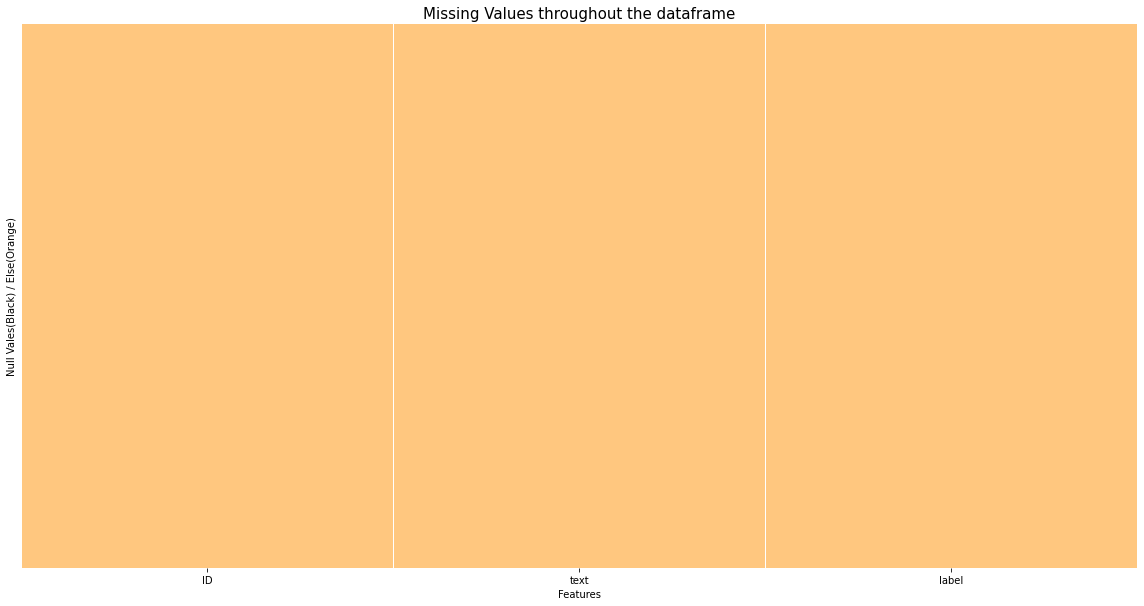

In [ ]:
### checking for null values in sentiemnts csv -------------------------------------------------------
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.heatmap(df.isnull(), cmap='copper_r', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('Features', Fontsize = 10)
ax.set_ylabel('Null Vales(Black) / Else(Orange)', Fontsize = 10)
ax.set_title('Missing Values throughout the dataframe', Fontsize = 15)


**Observation:**
Frome the above heat map we can clearly see that there are no missing values. To additionally confirm , im going to using is.null() to confirm once again for the presence of null values

In [ ]:
### checking missing values in each features
mvc = df.isna().sum().sort_values(ascending=False)
mvc #type = pandas series

label    0
text     0
ID       0
dtype: int64

It is now confirmed that there are no null values in sentiments dataset. Now going to check for missing values in

Text(0.5, 1.0, 'Missing Values throughout the dataframe')

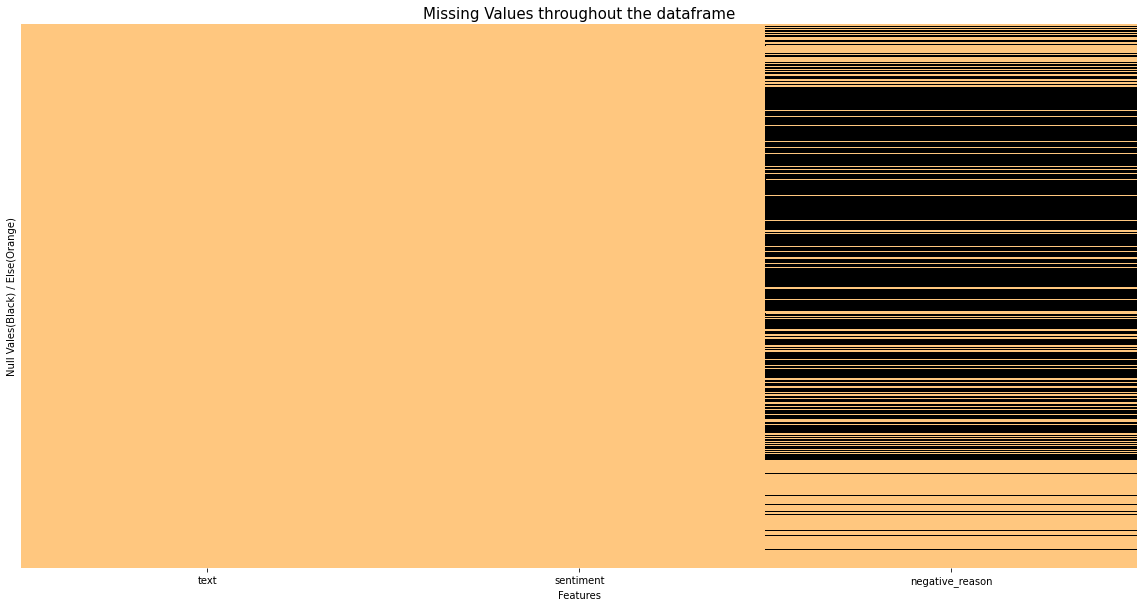

In [ ]:
### checking for null values in caandaina elections csv
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.heatmap(df_elec.isnull(), cmap='copper_r', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('Features', Fontsize = 10)
ax.set_ylabel('Null Vales(Black) / Else(Orange)', Fontsize = 10)
ax.set_title('Missing Values throughout the dataframe', Fontsize = 15)


In [ ]:
### checking missing values in each features
mvc = df_elec.isna().sum().sort_values(ascending=False)
mvc

negative_reason    615
sentiment            0
text                 0
dtype: int64

In [ ]:
# checking the entries in the text column against the 615 missing values
missing_textelec = df_elec[df_elec['negative_reason'].isnull()].index.tolist()
df_elec.loc[missing_textelec]['sentiment'].value_counts()

positive    615
Name: sentiment, dtype: int64

**Observation:**
As we can see, all the null values in the 'negative_reason' attribute is corresponding to the postive sentiment tweets as per 'sentiment' attribute. These null values checks out with context and the defination of the dataframe to have null in 'negative reason' for a positive tweet. Hence we can keep the data frame as it is.

In [ ]:
###----------------Removing noise from Sentiments Csv----------------------------

df['without_handle_names'] = df['text'].apply(lambda x: remove_thandle(x))
df['without_url'] = df['without_handle_names'].apply(lambda x: remove_URLs(x))
df['without_html'] = df['without_url'].apply(lambda x: converttoascii(x))
df['lowercased'] = df['without_html'].apply(lambda x: convertolower(x))
df['without_strange'] = df['lowercased'].apply(lambda x: diff_t(x))
### removing 'b' from the starting of every tweet
df['without_strange'] = df['without_strange'].apply(lambda x: x.lstrip('b"').lstrip("b'"))
## removing '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' punctuation
df['no_punctuation'] = df['without_strange'].apply(lambda x: elim_punct(x))
string.punctuation # output is string type
df['without_stopwords'] = df['no_punctuation'].apply(lambda x: elim_stopwords(x))
df['without_ascii'] = df['without_stopwords'].apply(lambda x: elim_nonascii(x))
tokenizer = RegexpTokenizer(r'\w+')         
df['tokenized'] = df['without_ascii'].apply(lambda x: tokenizer.tokenize(x))
df['stemmed'] = df['tokenized'].apply(lambda x: stemming(x))
df['lemmatized'] = df['tokenized'].apply(lambda x: lemma(x))
df['cleaned_detokenized'] = df['lemmatized'].apply(lambda x: detokenize(x))

The last column named 'cleaned_detokenized' has the final cleaned tweets
Creating copy of the original df so that the cleaned text is not disturbed later

In [ ]:
df_1 = df[['label','cleaned_detokenized']]

In [ ]:
###----------------Removing noise from Canada election csv----------------------------

df_elec['without_handle_names'] = df_elec['text'].apply(lambda x: remove_thandle(x))
df_elec['without_url'] = df_elec['without_handle_names'].apply(lambda x: remove_URLs(x))
df_elec['without_html'] = df_elec['without_url'].apply(lambda x: converttoascii(x))
df_elec['lowercased'] = df_elec['without_html'].apply(lambda x: convertolower(x))
df_elec['without_strange'] = df_elec['lowercased'].apply(lambda x: diff_t(x))
### removing 'b' from the starting of every tweet
df_elec['without_strange'] = df_elec['without_strange'].apply(lambda x: x.lstrip('b"').lstrip("b'"))
## removing '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' punctuation
df_elec['no_punctuation'] = df_elec['without_strange'].apply(lambda x: elim_punct(x))
string.punctuation # output is string type
df_elec['without_stopwords'] = df_elec['no_punctuation'].apply(lambda x: elim_stopwords(x))
df_elec['without_ascii'] = df_elec['without_stopwords'].apply(lambda x: elim_nonascii(x))
tokenizer = RegexpTokenizer(r'\w+')         
df_elec['tokenized'] = df_elec['without_ascii'].apply(lambda x: tokenizer.tokenize(x))
df_elec['stemmed'] = df_elec['tokenized'].apply(lambda x: stemming(x))
df_elec['lemmatized'] = df_elec['tokenized'].apply(lambda x: lemma(x))
df_elec['cleaned_detokenized'] = df_elec['lemmatized'].apply(lambda x: detokenize(x))

In [ ]:
##printing out he datafrasme after processing the tweets and cleaned_detokenzied columns contains the processed tweets
df_elec.head()

,text,sentiment,negative_reason,without_handle_names,without_url,without_html,lowercased,without_strange,no_punctuation,without_stopwords,without_ascii,tokenized,stemmed,lemmatized,cleaned_detokenized
0,The Canadian election is a power grab by PM Tr...,negative,calling election early,The Canadian election is a power grab by PM Tr...,The Canadian election is a power grab by PM Tr...,The Canadian election is a power grab by PM Tr...,the canadian election is a power grab by pm tr...,the canadian election is a power grab by pm tr...,the canadian election is a power grab by pm tr...,canadian election power grab pm trudeau opposi...,canadian election power grab pm trudeau opposi...,"[canadian, election, power, grab, pm, trudeau,...","[canadian, elect, power, grab, pm, trudeau, op...","[canadian, election, power, grab, pm, trudeau,...",canadian election power grab pm trudeau opposi...
1,I do hope Trudeau loses the Canadian election ...,negative,covid,I do hope Trudeau loses the Canadian election ...,I do hope Trudeau loses the Canadian election ...,I do hope Trudeau loses the Canadian election ...,i do hope trudeau loses the canadian election ...,i do hope trudeau loses the canadian election ...,i do hope trudeau loses the canadian election ...,hope trudeau loses canadian election tomorrow ...,hope trudeau loses canadian election tomorrow ...,"[hope, trudeau, loses, canadian, election, tom...","[hope, trudeau, lose, canadian, elect, tomorro...","[hope, trudeau, loses, canadian, election, tom...",hope trudeau loses canadian election tomorrow ...
2,"Dear Canadians, This election is a test of how...",positive,NaN,"Dear Canadians, This election is a test of how...","Dear Canadians, This election is a test of how...","Dear Canadians, This election is a test of how...","dear canadians, this election is a test of how...","dear canadians, this election is a test of how...",dear canadians this election is a test of how ...,dear canadians election test progressive stand...,dear canadians election test progressive stand...,"[dear, canadians, election, test, progressive,...","[dear, canadian, elect, test, progress, stand,...","[dear, canadian, election, test, progressive, ...",dear canadian election test progressive stand ...
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early,Canadian friends: Never forget that Trudeau ha...,Canadian friends: Never forget that Trudeau ha...,Canadian friends: Never forget that Trudeau ha...,canadian friends: never forget that trudeau ha...,canadian friends: never forget that trudeau ha...,canadian friends never forget that trudeau had...,canadian friends forget trudeau years mandate ...,canadian friends forget trudeau years mandate ...,"[canadian, friends, forget, trudeau, years, ma...","[canadian, friend, forget, trudeau, year, mand...","[canadian, friend, forget, trudeau, year, mand...",canadian friend forget trudeau year mandate ca...
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN,Sorry I have voted #NDP all my life but in thi...,Sorry I have voted #NDP all my life but in thi...,Sorry I have voted #NDP all my life but in thi...,sorry i have voted #ndp all my life but in thi...,sorry i have voted #ndp all my life but in thi...,sorry i have voted ndp all my life but in this...,voted ndp life election fighting freedoms cana...,voted ndp life election fighting freedoms cana...,"[voted, ndp, life, election, fighting, freedom...","[vote, ndp, life, elect, fight, freedom, canad...","[voted, ndp, life, election, fighting, freedom...",voted ndp life election fighting freedom canad...


In [ ]:
##storing 'sentiment','negative_reason', 'cleaned_detokenized' into a seperate dtaframe to be used in further analysis
df_elec_1 = df_elec[['sentiment','negative_reason', 'cleaned_detokenized']]

##**2. Exploratory Analysis**

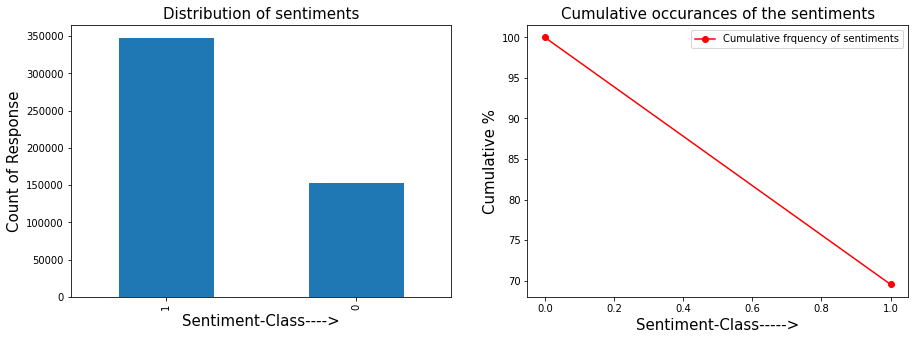

In [ ]:
plt.figure(figsize=(15,5))
te = df_1.shape[0]
fp = [i/te*100 for i in df_1['label'].value_counts()]
cum_fp = np.cumsum(fp) #calculation of cumulative value

plt.subplot(1,2,1)
ax = df_1['label'].value_counts().plot(kind='bar')
ax.set_title('Distribution of sentiments', fontsize = 15)
ax.set_xlabel("Sentiment-Class---->", fontsize = 15)
ax.set_ylabel("Count of Response", fontsize = 15)

plt.subplot(1,2,2)
plt.yticks(np.arange(0,105,5), rotation='horizontal')
plt.plot(df_1['label'].value_counts().index.tolist(), cum_fp, 'r-o',label='Cumulative frquency of sentiments')
plt.title("Cumulative occurances of the sentiments", fontsize = 15)
plt.xlabel('Sentiment-Class----->', fontsize = 15)
plt.ylabel('Cumulative %', fontsize = 15)
plt.legend()



**Observation:**
We can see that all of the data is of negative and positive sentiments in the sentiment.csv dataframe.



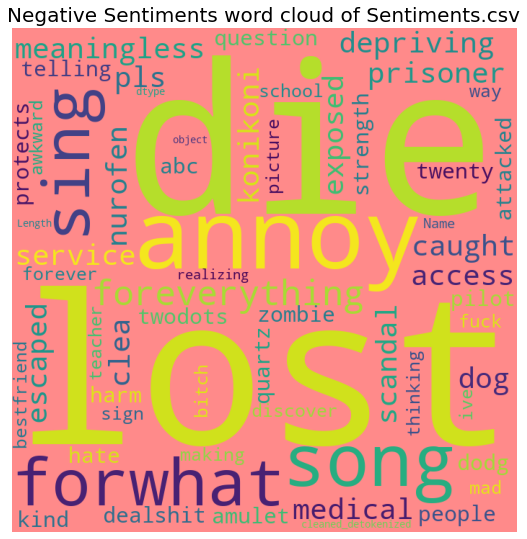

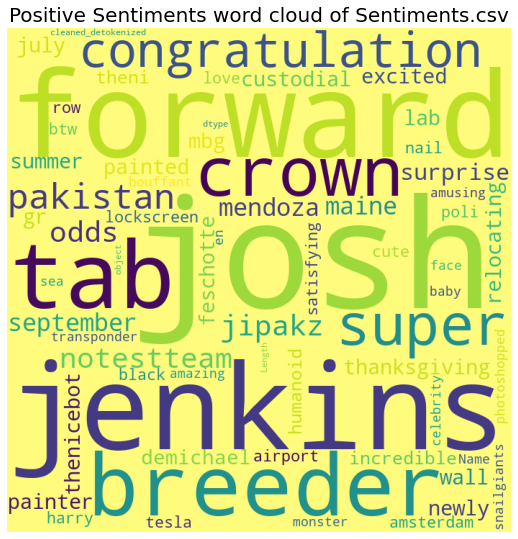

In [ ]:
## WordCloud for -ve tweets in Sentiments dataset
wordcloud_sentiments_nve = WordCloud(width = 700, height = 700, background_color ='#ff8a8a', min_font_size = 4).generate(str(df_1[df_1['label']== 0]['cleaned_detokenized']))
  
# plottinhg the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_sentiments_nve) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Negative Sentiments word cloud of Sentiments.csv', fontsize = 20, y = 50)

## WordCloud for +ve tweets in Sentiments dataset
wordcloud_sentiments_pve = WordCloud(width = 700, height = 700, background_color ='#fffb7d', min_font_size = 4).generate(str(df_1[df_1['label']== 1]['cleaned_detokenized']))
  
# plotting the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_sentiments_pve) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Positive Sentiments word cloud of Sentiments.csv', fontsize = 20, y = 50)

plt.show()

**Observation:**

Negative wordcloud = It is evident that the words such as 'die', 'lost', 'meaningles', 'hate', 'forwhat', 'prisoner' appear most of the times

Positive wordcloud = It is evident that the words such as 'forward', 'crown', 'super', 'tab', 'towards', 'tab', 'josh' appear most of the times

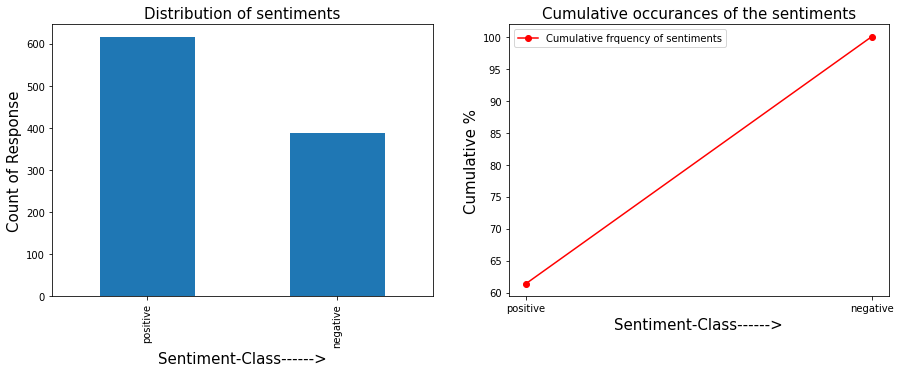

In [ ]:
plt.figure(figsize=(15,5))
te = df_elec_1.shape[0]
fp = [i/te*100 for i in df_elec_1['sentiment'].value_counts()]
cum_fp = np.cumsum(fp) #calculation of cumulative value

plt.subplot(1,2,1)
ax = df_elec_1['sentiment'].value_counts().plot(kind='bar')
ax.set_title('Distribution of sentiments', fontsize = 15)
ax.set_xlabel("Sentiment-Class------>", fontsize = 15)
ax.set_ylabel("Count of Response", fontsize = 15)

plt.subplot(1,2,2)
plt.yticks(np.arange(0,105,5), rotation='horizontal')
plt.plot(df_elec_1['sentiment'].value_counts().index.tolist(), cum_fp, 'r-o',label='Cumulative frquency of sentiments')
plt.title("Cumulative occurances of the sentiments", fontsize = 15)
plt.xlabel('Sentiment-Class------>', fontsize = 15)
plt.ylabel('Cumulative %', fontsize = 15)
plt.legend()



**Observation:**
The distribution looks fairly distriuted among both positive and negative sentiment classes

Now, classifying the tweets of political partirs with which the tweet is related too based on certain keywords


In [ ]:
# defining key words

liberal = '|'.join(['justintrudeau','trudeau', 'justin', 'liberal', 'lpc'])
conservative = '|'.join(['conservative','andrew', 'scheer', 'andrewscheer', 'scheerhypocrisy', 'cpc'])
ndp = '|'.join(['jagmeet','thejagmeetsingh', 'singh', 'democratic', 'ndp',])

df_elec_1['political_party'] = '0' ## initiating an empty colum in the dataframe to be filled with political parties

Now, allocating tweets containing combination of the key words from all the parties as 'Mixed', other wise 'Libral' or 'Conservative' or 'NDP'. If the tweet doesnt contain any of the above letters, then it would be termed as 'None'

In [ ]:
for i in range (df_elec_1.shape[0]):
    if ((pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0]) & (pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0])) | ((pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0]) & (pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0])) | ((pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0]) & (pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0])):
        df_elec_1['political_party'][i] = 'Mixed'
        
    elif pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(ndp)[0]:
        df_elec_1['political_party'][i] = 'NDP'
        
    elif pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(conservative)[0]:
        df_elec_1['political_party'][i] = 'Conservative'
        
    elif pd.Series(df_elec_1['cleaned_detokenized'][i]).str.contains(liberal)[0]:
        df_elec_1['political_party'][i] = 'Liberal'
        
    else:
        df_elec_1['political_party'][i] = 'None'

In [ ]:
df_elec_1

,sentiment,negative_reason,cleaned_detokenized,political_party
0,negative,calling election early,canadian election power grab pm trudeau opposi...,Liberal
1,negative,covid,hope trudeau loses canadian election tomorrow ...,Liberal
2,positive,NaN,dear canadian election test progressive stand ...,None
3,negative,calling election early,canadian friend forget trudeau year mandate ca...,Liberal
4,positive,NaN,voted ndp life election fighting freedom canad...,NDP
...,...,...,...,...
997,negative,others,absolutely horrible canada forthcoming electio...,None
998,negative,gun control,trudeau imposes gun control policy utterly fai...,Liberal
999,negative,others,canada election stolen thug uneducated goon de...,None
1000,negative,tell lies,otoole amends platform gun control question re...,None


Text(0, 0.5, 'Count of Response')

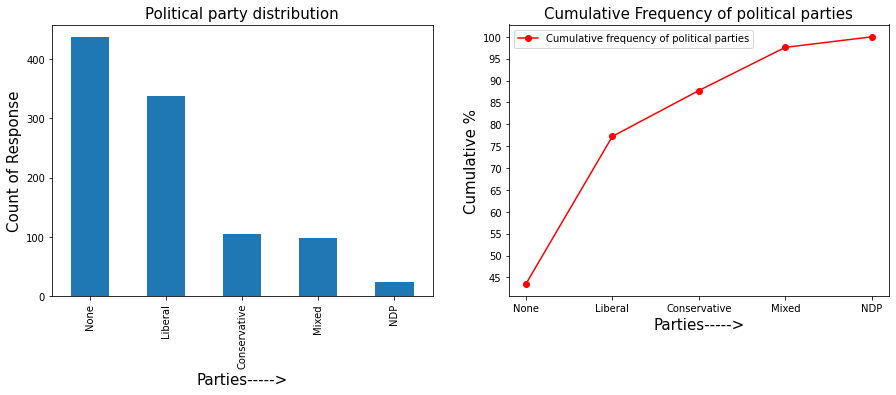

In [ ]:
##distribution of political parties 
plt.figure(figsize=(15,5))

total_entries = df_elec_1.shape[0]
frequency_percent = [i/total_entries*100 for i in df_elec_1['political_party'].value_counts()]
cum_frequency_percent = np.cumsum(frequency_percent) #calculation of cumulative value

plt.subplot(1,2,2)
plt.yticks(np.arange(0,105,5), rotation='horizontal')
plt.plot(df_elec_1['political_party'].value_counts().index.tolist(), cum_frequency_percent, 'r-o', 
         label='Cumulative frequency of political parties')
plt.title("Cumulative Frequency of political parties", fontsize = 15)
plt.xlabel('Parties----->', fontsize = 15)
plt.ylabel('Cumulative %', fontsize = 15)
plt.legend()

# exploring the profession of responders:

plt.subplot(1,2,1)
ax = df_elec_1['political_party'].value_counts().plot(kind='bar')
ax.set_title('Political party distribution', fontsize = 15)
ax.set_xlabel("Parties----->", fontsize = 15)
ax.set_ylabel("Count of Response", fontsize = 15)

from the above graphs we can see that the number of resposnes for each political party

Exploration of Political spread of the tweets with respect to negative and positive tweets

In [ ]:
## exploring the age group of responders  with genders: using pivot tables
df_elec_pivot1 = df_elec_1[['sentiment', 'political_party']]
df_elec_pivot1['count'] = 1

## using pivot table to filter out desired columns
df_elec_pivot1 = pd.pivot_table(df_elec_pivot1, values = 'count', index = 'political_party',columns = 'sentiment', aggfunc=np.sum, fill_value=0)

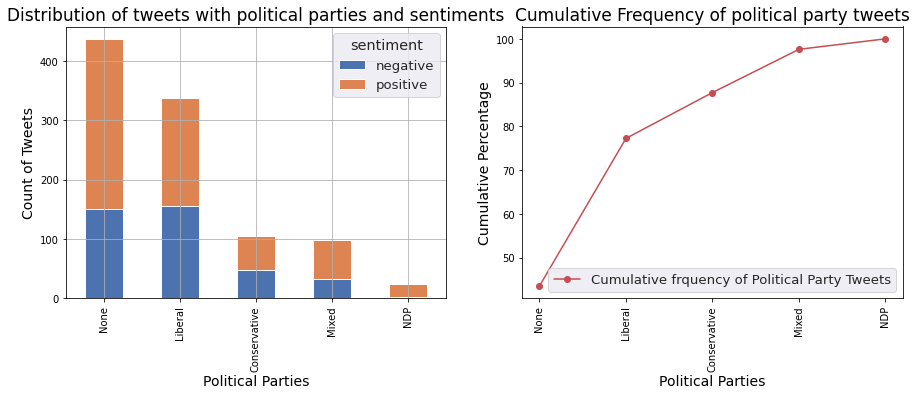

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.set(font_scale=1.2)
# plt.subplot(2,1,1)
ax = df_elec_pivot1.loc[['None','Liberal','Conservative', 'Mixed','NDP']].plot.bar(stacked=True, ax = ax1)
plt.xticks(rotation='vertical', fontsize="10")
ax.set_title("Distribution of tweets with political parties and sentiments", fontsize = 17)
ax.set_xlabel("Political Parties", fontsize = 14)
ax.set_ylabel("Count of Tweets", fontsize = 14)

total_entries1 = df_elec_1.shape[0]
frequency_percent1 = [i/total_entries1*100 for i in df_elec_1['political_party'].value_counts()]
cum_frequency_percent1 = np.cumsum(frequency_percent1) #calculation of cumulative value

plt.plot(df_elec_1['political_party'].value_counts().index.tolist(), cum_frequency_percent1, 'r-o', label='Cumulative frquency of Political Party Tweets')
plt.xlabel('Political Parties', fontsize = 14)
plt.ylabel('Cumulative Percentage', fontsize = 14)
plt.xticks(rotation='vertical')
plt.title("Cumulative Frequency of political party tweets", fontsize = 17)
# plt.xticks(rotation='vertical')
plt.legend()

**Observation:**
It is observed that  for mixed class the positive tweets are higher than their negative tweets and NDP has more psotive tweets as well


Exploring the negative tweets political distribution

In [ ]:
import copy
df_elec_pivot2 = copy.deepcopy(df_elec_pivot1)
df_elec_pivot2['Total'] = df_elec_pivot2['negative'] + df_elec_pivot2['positive']
df_elec_pivot2

sentiment,negative,positive,Total
political_party,,,
Conservative,48,57,105
Liberal,155,183,338
Mixed,32,67,99
NDP,2,22,24
None,150,286,436


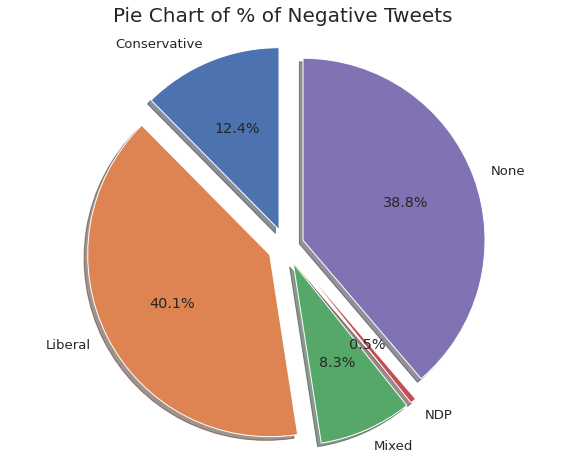

In [ ]:
labels = df_elec_pivot2.index.to_list()
sizes = [(x/df_elec_pivot2['negative'].to_numpy().sum())*100 for x in df_elec_pivot2['negative'].to_numpy()]
explode = (0.1, 0.1, 0.1, 0.1, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Chart of % of Negative Tweets ', fontsize = 20)
plt.show()

Observation:
As we can see the negative tweets are most for the Liberal party (40.1% of all the negative tweets) and NDP has the lowest number of negative tweets of all (0.5%)

Exploring the positive to negative tweets ratio

In [ ]:
df_elec_pivot2['Ratio'] = df_elec_pivot2['positive']/df_elec_pivot2['negative']
df_elec_pivot2['political_party'] = df_elec_pivot2.index
df_elec_pivot2.iloc[:,0:-1]

sentiment,negative,positive,Total,Ratio
political_party,,,,
Conservative,48,57,105,1.187500
Liberal,155,183,338,1.180645
Mixed,32,67,99,2.093750
NDP,2,22,24,11.000000
None,150,286,436,1.906667


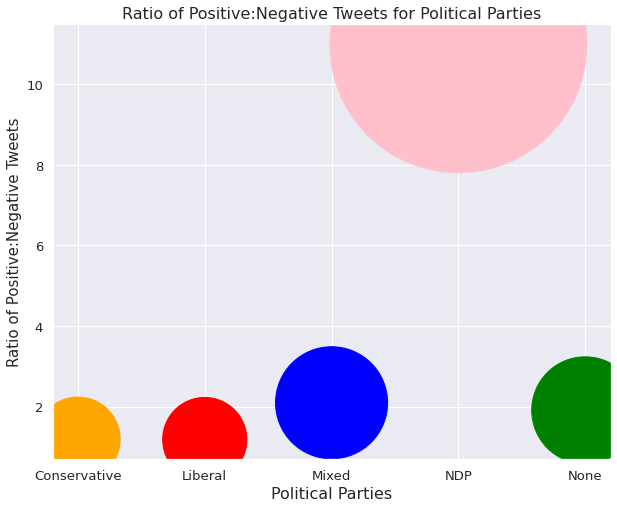

<Figure size 432x288 with 0 Axes>

In [ ]:
j, i = np.unique(df_elec_pivot2.index.to_list(), return_inverse=True)

fig1, ax1 = plt.subplots(figsize = (10,8))
plt.scatter(i, df_elec_pivot2['Ratio'], s = df_elec_pivot2['Ratio']*6000, color=['orange','red','blue','pink', 'green'], 
            label = df_elec_pivot2['Ratio'].to_list())
plt.xticks(range(len(j)), j)
plt.title('Ratio of Positive:Negative Tweets for Political Parties', fontsize = 16)
plt.xlabel('Political Parties', fontsize = 16)
plt.ylabel('Ratio of Positive:Negative Tweets', fontsize = 15)
plt.show()
plt.tight_layout()

**Observation:**
we can clearly se that NDP has the maximum positive to negative tweets ratio and the lowest ratio is of Conservatives

Word Cloud Analysis of Political Sentiments

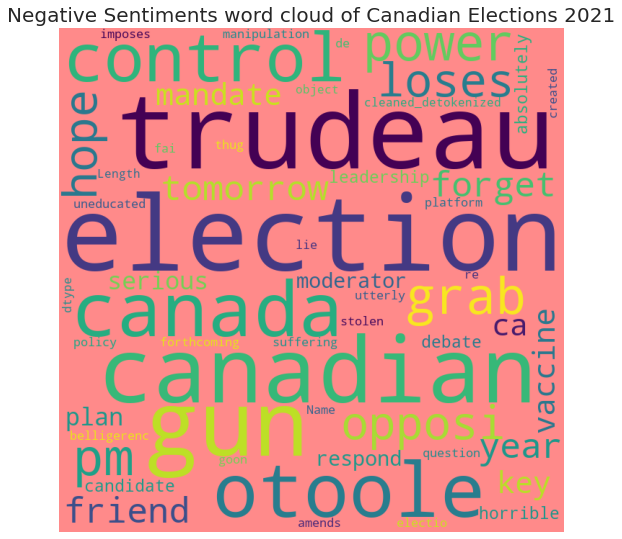

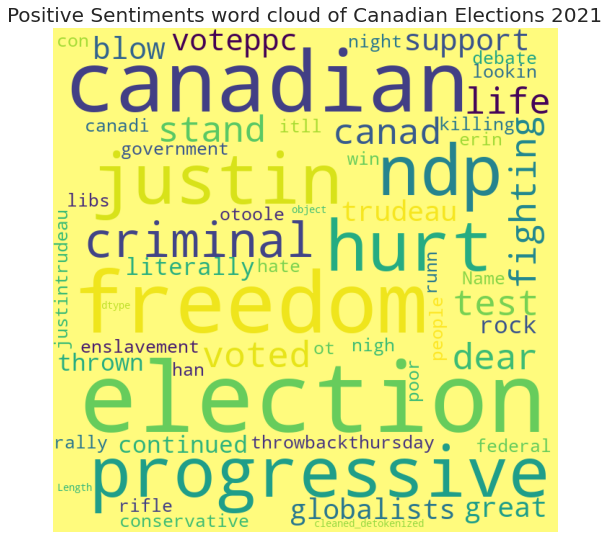

In [ ]:
## WordCloud for NEGATIVE tweets in Sentiments Dataset

wordcloud_elec_neg = WordCloud(width = 700, height = 700, background_color ='#ff8a8a', min_font_size = 4).generate(str(df_elec_1[df_elec_1['sentiment']=='negative']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_elec_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Negative Sentiments word cloud of Canadian Elections 2021', fontsize = 20, y = 50)

## WordCloud for Positive tweets in Sentiments Dataset

wordcloud_elec_pos = WordCloud(width = 700, height = 700, background_color ='#fffb7d', min_font_size = 4).generate(str(df_elec_1[df_elec_1['sentiment']=='positive']['cleaned_detokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_elec_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Positive Sentiments word cloud of Canadian Elections 2021', fontsize = 20, y = 50)

plt.show()

**Observation:**

Negative Word Cloud of Elections = It seems Justin Trudue (Liberal Party) and Otoole (Conservative Party) appear most in the negative cloud. Hence this could highlight that peoples hatred have been focused on the two major ruling parties in Canada i.e. Liberals and Conservatives

Positive Word Cloud of Elections = Besides 'election' and 'vote' appearing in the positive word cloud, words like 'justintrudeau' and 'ppc' also appears in twitter. This suggested that public has a positive outlook for the liberal party

##**3. Model Preperation**

In [ ]:
###---------for sentiments.csv----------------------
X_senti = df_1['cleaned_detokenized']
y_senti = df_1['label']  ##target

Features are not scaled here becausse the most accepted idea is that bag-of-words, Tf-Idf and other transformations should be left as it is.

Source: https://datascience.stackexchange.com/questions/33730/should-i-rescale-tfidf-features

###**3.1 Word Frequency Data Preparation (Bag of Words) or Term Frequency (TF)**

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

For example, if you have 3 documents-

D1 - “I am really happy today”

D2 - “I am not feeling well today”

D3 - “I wish I could go out tommorow”

First, it creates a vocabulary using unique words from all the documents -

Unique list of words -

I am really happy today  am not feeling well wish could go out tommorow

Then, for each word the frequency of the word in the corresponding document is inserted

Source: https://machinelearningmastery.com/gentle-introduction-bag-words-model/


In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text
# Also, we limit the words with max of 2000 features with maximum frequency to save computational time
countvect_senti = CountVectorizer(max_features=2000)

# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
X_senti_df = countvect_senti.fit_transform(X_senti)

X_senti_df_print = pd.DataFrame(np.round(X_senti_df.toarray(), 4), columns = countvect_senti.get_feature_names())
X_senti_df_print.head()

,ability,absolute,absolutely,abt,abuse,accept,accident,account,accurate,achievement,...,yoga,york,youll,young,youth,youtube,youve,yr,yummy,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###**3.2 Inverse Document Frequency Data Preparation (TF-IDF)**

While computing TF, all terms are considered equally important. However it is known that certain terms, such as “is”, “of”, and “that”, may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing IDF, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.
IDF is the inverse of the document frequency which measures the informativeness of term t.


Source: https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558

In [ ]:
## TF-IDF
## Choosing max no of features as 2000 to save computational time
tfidf_senti = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=2000) 
X_senti_tfidf = tfidf_senti.fit_transform(X_senti)

In [ ]:
X_senti_tfidf_print = pd.DataFrame(np.round(X_senti_tfidf.toarray(), 4), columns = tfidf_senti.get_feature_names())
X_senti_tfidf_print.head()

,ability,absolute,absolutely,abt,abuse,accept,accident,account,accurate,achievement,...,yoga,york,youll,young,youth,youtube,youve,yr,yummy,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**3.3 Trying multiple classification algorithms((logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost) with hyper parameter tuning and cross validation**


All the user defined function have bee defined earlier and we are just goint o call them one by one hre below.The fuinction also includes:

**Splitting the data into training and testing data** 30% testing and 70% training in all the functions of the classifiers

**Using stratify** This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

####**3.3.1 Logistic regression with hyperparameter tuning**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Source: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc?gi=9e2a67956d00

In [ ]:
logreg_report_tf_senti, logreg_acc_tf_senti, logreg_confusion_tf_senti, logreg_f1_score_tf_senti, _,lr_bs_tf_senti, lr_bp_tf_senti = logisticreg(X_senti_df, y_senti, test_size=0.3, param = {'C':[0.01,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
logreg_report_tfidf_senti, logreg_acc_tfidf_senti, logreg_confusion_tfidf_senti, logreg_f1_score_tfidf_senti, _, lr_bs_tfidf_senti,lr_bp_tfidf_senti = logisticreg(X_senti_tfidf, y_senti, test_size=0.3, param = {'C':[0.01,0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
print('\n ---------------------- Term Frequency Log. Regression Model ----------------------\n')
print(logreg_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',logreg_confusion_tf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)

print('\n ---------------------- TF-IDF Log. Regression Model ----------------------\n')
print(logreg_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',logreg_confusion_tfidf_senti)
print('\n Best Tuning Score is =', lr_bs_tfidf_senti)
print('\n Best Parameters are =', lr_bp_tfidf_senti)


 ---------------------- Term Frequency Log. Regression Model ----------------------

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.93      0.91      0.92     90000
weighted avg       0.94      0.94      0.94     90000

Accuracy =  93.902%
F1 Score =  93.822% 

Confusion Matrix --------
 [[18784  3571]
 [ 1917 65728]]

 Best Tuning Score is = 0.9379666666666666

 Best Parameters are = {'C': 1, 'solver': 'lbfgs'}

 ---------------------- TF-IDF Log. Regression Model ----------------------

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.93      0.90      0.92     90000
weighted avg       0.94      0.94      0.

####**3.3.2 KNN with hyperparameter tuning**

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

Source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

In [ ]:
knn_report_tf_senti, knn_acc_tf_senti, knn_confusion_tf_senti, knn_f1_score_tf_senti, _, knn_bs_tf_senti, knn_bp_tf_senti = knnclassifier(X_senti_df, y_senti, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3)

In [ ]:
knn_report_tfidf_senti, knn_acc_tfidf_senti, knn_confusion_tfidf_senti, knn_f1_score_tfidf_senti, _, knn_bs_tfidf_senti, knn_bp_tfidf_senti = knnclassifier(X_senti_tfidf, y_senti, param = {'n_neighbors':[5,8]}, cv = 2, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency KNN Model ----------------------\n')
print(knn_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(knn_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(knn_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',knn_confusion_tf_senti)
print('\n Best Tuning Score is =', knn_bs_tf_senti)
print('\n Best Parameters are =', knn_bp_tf_senti)


print('\n ---------------------- TF-IDF KNN Model ----------------------\n')
print(knn_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(knn_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(knn_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',knn_confusion_tfidf_senti)
print('\n Best Tuning Score is =', knn_bs_tfidf_senti)
print('\n Best Parameters are =', knn_bp_tfidf_senti)



 ---------------------- Term Frequency KNN Model ----------------------

              precision    recall  f1-score   support

           0       0.25      0.24      0.24     37259
           1       0.75      0.75      0.75    112741

   micro avg       0.63      0.63      0.63    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       0.63      0.63      0.63    150000

Accuracy =  90.768%
F1 Score =  90.743% 

Confusion Matrix --------
 [[ 30042   7217]
 [  6631 106110]]

 Best Tuning Score is = 0.89576

 Best Parameters are = {'n_neighbors': 8}

 ---------------------- TF-IDF KNN Model ----------------------

              precision    recall  f1-score   support

           0       0.25      0.26      0.26     37259
           1       0.75      0.74      0.75    112741

   micro avg       0.62      0.62      0.62    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       0.63      0.62      0.62    150000

Accuracy =  86.141%
F1 Sco

####**3.3.3 Naive Bayes (Multinomial)**

naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. 
Models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

Source : https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

In [ ]:
naive_bayes_multi_report_tf_senti, naive_bayes_multi_acc_tf_senti, naive_bayes_multi_confusion_tf_senti, naive_bayes_multi_f1_score_tf_senti, _ = naivebayesclass(X_senti_df, y_senti, alpha=1, test_size=0.3)

In [ ]:
naive_bayes_multi_report_tfidf_senti, naive_bayes_multi_acc_tfidf_senti, naive_bayes_multi_confusion_tfidf_senti, naive_bayes_multi_f1_score_tfidf_senti, _ = naivebayesclass(X_senti_tfidf, y_senti, alpha=1, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Naive Bayes (Multinomial) Model ----------------------\n')
print(naive_bayes_multi_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(naive_bayes_multi_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(naive_bayes_multi_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',naive_bayes_multi_confusion_tf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)


print('\n ---------------------- TF-IDF Naive Bayes (Multinomial) Model ----------------------\n')
print(naive_bayes_multi_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(naive_bayes_multi_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(naive_bayes_multi_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',naive_bayes_multi_confusion_tfidf_senti)
print('\n Best Tuning Score is =', lr_bs_tf_senti)
print('\n Best Parameters are =', lr_bp_tf_senti)



 ---------------------- Term Frequency Naive Bayes (Multinomial) Model ----------------------

              precision    recall  f1-score   support

           0       0.89      0.79      0.84     22355
           1       0.93      0.97      0.95     67645

   micro avg       0.92      0.92      0.92     90000
   macro avg       0.91      0.88      0.90     90000
weighted avg       0.92      0.92      0.92     90000

Accuracy =  92.479%
F1 Score =  92.323% 

Confusion Matrix --------
 [[17707  4648]
 [ 2121 65524]]

 Best Tuning Score is = 0.9379666666666666

 Best Parameters are = {'C': 1, 'solver': 'lbfgs'}

 ---------------------- TF-IDF Naive Bayes (Multinomial) Model ----------------------

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     22355
           1       0.95      0.94      0.94     67645

   micro avg       0.92      0.92      0.92     90000
   macro avg       0.88      0.89      0.89     90000
weighted avg       0.

####**3.3.4 SVM (Linear SVC) with hyperparameter tuning**

LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained. They are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

Source: https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/

In [ ]:
linear_svc_report_tf_senti, linear_svc_acc_tf_senti, linear_svc_confusion_tf_senti, linear_svc_f1_score_tf_senti, _, linear_svc_bs_tf_senti, linear_svc_bp_tf_senti = linearsvc(X_senti_df, y_senti, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
linear_svc_report_tfidf_senti, linear_svc_acc_tfidf_senti, linear_svc_confusion_tfidf_senti, linear_svc_f1_score_tfidf_senti, _, linear_svc_bs_tfidf_senti, linear_svc_bp_tfidf_senti = linearsvc(X_senti_tfidf, y_senti, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency SVM (Linear SVC) Model ----------------------\n')
print(linear_svc_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_tf_senti)
print('\n Best Tuning Score is =', linear_svc_bs_tf_senti)
print('\n Best Parameters are =', linear_svc_bp_tf_senti)


print('\n ---------------------- TF-IDF SVM (Linear SVC) Model ----------------------\n')
print(linear_svc_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_tfidf_senti)
print('\n Best Tuning Score is =', linear_svc_bs_tfidf_senti)
print('\n Best Parameters are =', linear_svc_bp_tfidf_senti)



 ---------------------- Term Frequency SVM (Linear SVC) Model ----------------------

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.93      0.91      0.92     90000
weighted avg       0.94      0.94      0.94     90000

Accuracy =  93.912%
F1 Score =  93.833% 

Confusion Matrix --------
 [[18799  3556]
 [ 1923 65722]]

 Best Tuning Score is = 0.9373809523809524

 Best Parameters are = {'C': 0.1}

 ---------------------- TF-IDF SVM (Linear SVC) Model ----------------------

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.93      0.91      0.92     90000
weighted avg       0.94      0.94      0.94     90000

A

####**3.3.5 Decision Trees with hyperparameter tuning**

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

Source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [ ]:
decision_trees_report_tf_senti, decision_trees_acc_tf_senti, decision_trees_confusion_tf_senti, decision_trees_f1_score_tf_senti, _, decision_trees_bs_tf_senti, decision_trees_bp_tf_senti = decisiontrees(X_senti_df, y_senti, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
decision_trees_report_tfidf_senti, decision_trees_acc_tfidf_senti, decision_trees_confusion_tfidf_senti, decision_trees_f1_score_tfidf_senti, _, decision_trees_bs_tfidf_senti, decision_trees_bp_tfidf_senti = decisiontrees(X_senti_tfidf, y_senti, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Decision Tree Model ----------------------\n')
print(decision_trees_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_tf_senti)
print('\n Best Tuning Score is =', decision_trees_bs_tf_senti)
print('\n Best Parameters are =', decision_trees_bp_tf_senti)


print('\n ---------------------- TF-IDF Decision Tree Model ----------------------\n')
print(decision_trees_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_tfidf_senti)
print('\n Best Tuning Score is =', decision_trees_bs_tfidf_senti)
print('\n Best Parameters are =', decision_trees_bp_tfidf_senti)



 ---------------------- Term Frequency Decision Tree Model ----------------------

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     22355
           1       0.95      0.96      0.95     67645

   micro avg       0.93      0.93      0.93     90000
   macro avg       0.91      0.90      0.90     90000
weighted avg       0.93      0.93      0.93     90000

Accuracy =  92.743%
F1 Score =  92.709% 

Confusion Matrix --------
 [[18781  3574]
 [ 2957 64688]]

 Best Tuning Score is = 0.9257142857142857

 Best Parameters are = {'criterion': 'entropy'}

 ---------------------- TF-IDF Decision Tree Model ----------------------

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     22355
           1       0.95      0.96      0.95     67645

   micro avg       0.93      0.93      0.93     90000
   macro avg       0.91      0.90      0.90     90000
weighted avg       0.93      0.93      0.93     

####**3.3.6 Random Forests with hyperparameter tuning**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Source: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [ ]:
random_forest_report_tf_senti, random_forest_acc_tf_senti, random_forest_confusion_tf_senti, random_forest_f1_score_tf_senti, _, random_forest_bs_tf_senti, random_forest_bp_tf_senti = randomforest(X_senti_df, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 2, test_size=0.3)

In [ ]:
random_forest_report_tfidf_senti, random_forest_acc_tfidf_senti, random_forest_confusion_tfidf_senti, random_forest_f1_score_tfidf_senti, _, random_forest_bs_tfidf_senti, random_forest_bp_tfidf_senti = randomforest(X_senti_tfidf, y_senti, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 2, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Random Forests Model ----------------------\n')
print(random_forest_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_tf_senti)
print('\n Best Tuning Score is =', random_forest_bs_tf_senti)
print('\n Best Parameters are =', random_forest_bp_tf_senti)


print('\n ---------------------- TF-IDF Random Forests Model ----------------------\n')
print(random_forest_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_tfidf_senti)
print('\n Best Tuning Score is =', random_forest_bs_tfidf_senti)
print('\n Best Parameters are =', random_forest_bp_tfidf_senti)



 ---------------------- Term Frequency Random Forests Model ----------------------

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.92      0.91      0.91     90000
weighted avg       0.94      0.94      0.94     90000

Accuracy =  93.691%
F1 Score =  93.635% 

Confusion Matrix --------
 [[18949  3406]
 [ 2272 65373]]

 Best Tuning Score is = 0.9329666666666667

 Best Parameters are = {'criterion': 'entropy', 'n_estimators': 100}

 ---------------------- TF-IDF Random Forests Model ----------------------

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     22355
           1       0.95      0.97      0.96     67645

   micro avg       0.94      0.94      0.94     90000
   macro avg       0.92      0.91      0.91     90000
weighted avg       0.94  

####**3.3.7 XG Boost with hyperparameter tuning**
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

Source: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [ ]:
xgboost_model_report_tf_senti, xgboost_model_acc_tf_senti, xgboost_model_confusion_tf_senti, xgboost_model_f1_score_tf_senti, _, xgboost_model_bs_tf_senti, xgboost_model_bp_tf_senti = XGBoost(X_senti_df, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

[23:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
xgboost_model_report_tfidf_senti, xgboost_model_acc_tfidf_senti, xgboost_model_confusion_tfidf_senti, xgboost_model_f1_score_tfidf_senti, _, xgboost_model_bs_tfidf_senti, xgboost_model_bp_tfidf_senti = XGBoost(X_senti_tfidf, y_senti, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

[23:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
print('\n ---------------------- Term Frequency XG Boost Model ----------------------\n')
print(xgboost_model_report_tf_senti)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_tf_senti))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_tf_senti), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_tf_senti)
print('\n Best Tuning Score is =', xgboost_model_bs_tf_senti)
print('\n Best Parameters are =', xgboost_model_bp_tf_senti)


print('\n ---------------------- TF-IDF XG Boost Model ----------------------\n')
print(xgboost_model_report_tfidf_senti)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_tfidf_senti))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_tfidf_senti), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_tfidf_senti)
print('\n Best Tuning Score is =', xgboost_model_bs_tfidf_senti)
print('\n Best Parameters are =', xgboost_model_bp_tfidf_senti)



 ---------------------- Term Frequency XG Boost Model ----------------------

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22355
           1       0.93      0.98      0.95     67645

   micro avg       0.93      0.93      0.93     90000
   macro avg       0.92      0.88      0.90     90000
weighted avg       0.93      0.93      0.93     90000

Accuracy =  92.882%
F1 Score =  92.690% 

Confusion Matrix --------
 [[17551  4804]
 [ 1602 66043]]

 Best Tuning Score is = 0.9280095238095238

 Best Parameters are = {'learning_rate': 1.5}

 ---------------------- TF-IDF XG Boost Model ----------------------

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22355
           1       0.93      0.98      0.95     67645

   micro avg       0.93      0.93      0.93     90000
   macro avg       0.92      0.88      0.90     90000
weighted avg       0.93      0.93      0.93     90000

Accur

##**4. Model Implementation and Tuning**

###**4.1 Analysing the accuracy results**

####**4.1.1 Analysing the accuracy results of all the tuned models**

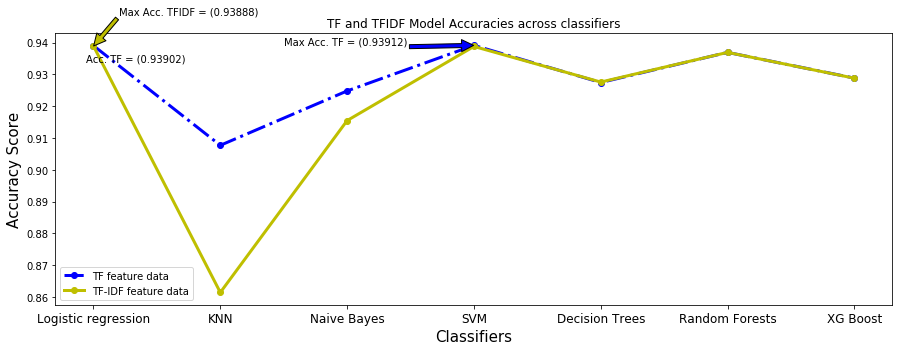

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

tf_acc_scores = [logreg_acc_tf_senti, knn_acc_tf_senti, naive_bayes_multi_acc_tf_senti, linear_svc_acc_tf_senti,decision_trees_acc_tf_senti, random_forest_acc_tf_senti, xgboost_model_acc_tf_senti]

tfidf_acc_scores = [logreg_acc_tfidf_senti, knn_acc_tfidf_senti, naive_bayes_multi_acc_tfidf_senti, linear_svc_acc_tfidf_senti, decision_trees_acc_tfidf_senti, random_forest_acc_tfidf_senti, xgboost_model_acc_tfidf_senti]

classifiers_list = ['Logistic regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Trees', 'Random Forests', 'XG Boost'] 

plt.subplot(1,1,1)
plt.plot(classifiers_list, tf_acc_scores, marker='o', color='b', linestyle='-.', linewidth=3, label = 'TF feature data')
plt.plot(classifiers_list, tfidf_acc_scores, marker='o', color='y', linewidth=3, label = 'TF-IDF feature data')
plt.xticks(np.arange(0,7,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
# plt.ylim([0.6,0.8])
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('TF and TFIDF Model Accuracies across classifiers')

ymax = max(np.asarray(tf_acc_scores, dtype=np.float32))
xmax = np.where(tf_acc_scores == np.amax(np.asarray(tf_acc_scores)))[0]
plt.annotate('Max Acc. TF = (%.5f)'%(np.amax(np.asarray(tf_acc_scores))), xy=(xmax, ymax), xytext=(xmax-1.5, ymax+0.0002), arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))

ymax = max(np.asarray(tfidf_acc_scores, dtype=np.float32))
xmax = logreg_acc_tf_senti
plt.annotate('Acc. TF = (%.5f)'%(logreg_acc_tf_senti), xy=(xmax, ymax), xytext=(xmax-1, ymax-0.005))

ymax = max(np.asarray(tfidf_acc_scores, dtype=np.float32))
xmax = np.where(tfidf_acc_scores == np.amax(np.asarray(tfidf_acc_scores)))[0]
plt.annotate('Max Acc. TFIDF = (%.5f)'%(np.amax(np.asarray(tfidf_acc_scores))), xy=(xmax, ymax), xytext=(xmax+0.2, ymax+0.01),arrowprops=dict(facecolor='y', shrink = 0.005, frac=0.1))

plt.legend()
plt.show()

We can clearly see from the above graph that the best model that priovided the best accuracy would be Logistic regression since the model for both Bag of words and TF-IDF are giving accuracies approximately 93.8% and 93.902 respectively , while the SVM model for Bag of Words is giving an accuracy of 93.91 and for tfidf 93.87.Also, another reason to choose Liner regression model is due to computation time, since my sytem is able to run Logistic regression faster than SVM

printing out the results for logistic regression using TF or Bag of Words

In [ ]:
print('Best Tuning Score is =', "{0:.3%}".format(lr_bs_tf_senti))
print('Best Parameters are =', lr_bp_tf_senti)
print('Model Accuracy for logistic regression is =', "{0:.3%}".format(logreg_acc_tf_senti))

Best Tuning Score is = 93.797%
Best Parameters are = {'C': 1, 'solver': 'lbfgs'}
Model Accuracy for logistic regression is = 93.902%


**Note:** So probably insteds of using Bag of words and TF-IDF  we could opt for metrics such as 

**A). Word2Vec** is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words. It takes as its input a large corpus of words and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

**B). N-Grams** in combination with Bag of Words is a more sophisticated approach to create a vocabulary of grouped words. This changes both the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document. In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams.

####**4.1.2 Implementing Model in elections dataset**

In [ ]:
## Mapping positive and negative to 1 and 0 in the elections dataset
map_senti = {'positive':1, 'negative':0}

X_election = df_elec_1['cleaned_detokenized']
y_election = df_elec_1.replace({'sentiment': map_senti})['sentiment']

In [ ]:
## TF
## Choosing max no of features as 2000 to save computational time
tf_elec = CountVectorizer(max_features=2000)
X_elec_tf = tf_elec.fit_transform(X_election)

# to print the dataframe
X_elec_tf_print = pd.DataFrame(np.round(X_elec_tf.toarray(), 4), columns = tf_elec.get_feature_names())
X_elec_tf_print.head()

,ability,ableg,abpoli,absolutely,accept,accessible,account,accountable,action,actual,...,youll,young,younger,youth,youthvote,youtube,youve,youwe,yup,yyc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using the Logistic Regression Model already trained for general tweets in the above section

In [ ]:
logreg_model_tuned_sentiments = LogisticRegression(random_state=1624, solver = lr_bp_tf_senti['solver'], C=lr_bp_tf_senti['C']).fit(X_senti_df, y_senti)
logreg_model_tuned_elections_pred = logreg_model_tuned_sentiments.predict(X_elec_tf)
logreg_tuned_elections_report = classification_report(y_election,logreg_model_tuned_elections_pred)
logreg_tuned_elections_acc = accuracy_score(y_election, logreg_model_tuned_elections_pred)
logreg_tuned_elections_confusion = confusion_matrix(y_election, logreg_model_tuned_elections_pred)
logreg_tuned_elections_f1_score = f1_score(y_election, logreg_model_tuned_elections_pred)

In [ ]:
print('\n ---------------------- Term Frequency General Tweet Log. Regression Model ON Election SET ----------------------\n')
print(logreg_tuned_elections_report)
print('Accuracy = ', "{0:.3%}".format(logreg_tuned_elections_acc))
print('F1 Score = ', "{0:.3%}".format(logreg_tuned_elections_f1_score), '\n')
print('Confusion Matrix --------\n',logreg_tuned_elections_confusion)


 ---------------------- Term Frequency General Tweet Log. Regression Model ON Election SET ----------------------

              precision    recall  f1-score   support

           0       0.41      0.54      0.46       387
           1       0.64      0.50      0.56       615

   micro avg       0.52      0.52      0.52      1002
   macro avg       0.52      0.52      0.51      1002
weighted avg       0.55      0.52      0.52      1002

Accuracy =  51.796%
F1 Score =  56.210% 

Confusion Matrix --------
 [[209 178]
 [305 310]]


we can clearly see that the accuracy of the model achieved on sentiments .csv is 51.796% with logarathimic regression on election dataset

####**4.1.3 Visualizing the sentiment prediction results for each of the parties**

In [ ]:
## Making a Dataframe of correct and false prediction on elections data set
import copy
df_elec_2 = copy.deepcopy(df_elec_1)
df_elec_2['sentiment_predictions'] = pd.Series(logreg_model_tuned_elections_pred).map({0:'negative',1:'positive'})

df_elec_2['sentiment_vs_pred'] = 0

for i in range (df_elec_2.shape[0]):
    if df_elec_2['sentiment'][i] == df_elec_2['sentiment_predictions'][i]:
        df_elec_2['sentiment_vs_pred'][i] = 'Correct_Prediction'
    else:
        df_elec_2['sentiment_vs_pred'][i] = 'Wrong_Prediction'


In [ ]:
df_elec_2.head()

,sentiment,negative_reason,cleaned_detokenized,political_party,sentiment_predictions,sentiment_vs_pred
0,negative,calling election early,canadian election power grab pm trudeau opposi...,Liberal,positive,Wrong_Prediction
1,negative,covid,hope trudeau loses canadian election tomorrow ...,Liberal,positive,Wrong_Prediction
2,positive,NaN,dear canadian election test progressive stand ...,None,positive,Correct_Prediction
3,negative,calling election early,canadian friend forget trudeau year mandate ca...,Liberal,positive,Wrong_Prediction
4,positive,NaN,voted ndp life election fighting freedom canad...,NDP,negative,Wrong_Prediction


Text(0, 0.5, 'Count of Predictions')

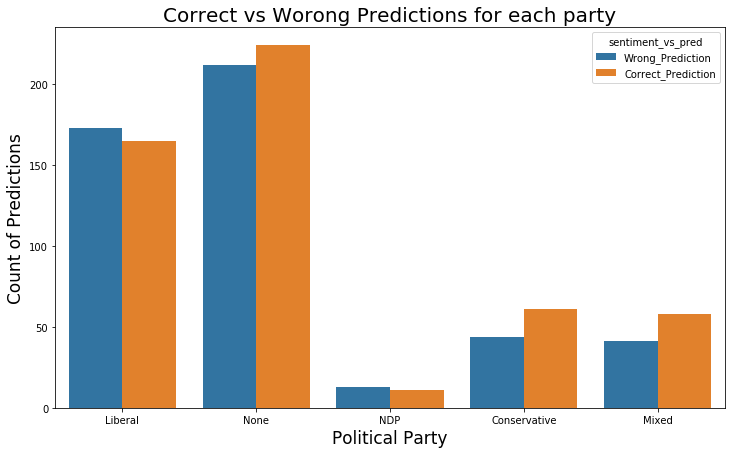

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=df_elec_2, hue='sentiment_vs_pred')
ax.set_title('Correct vs Worong Predictions for each party', fontsize = 20)
ax.set_xlabel('Political Party', fontsize = 17)
ax.set_ylabel('Count of Predictions', fontsize = 17)


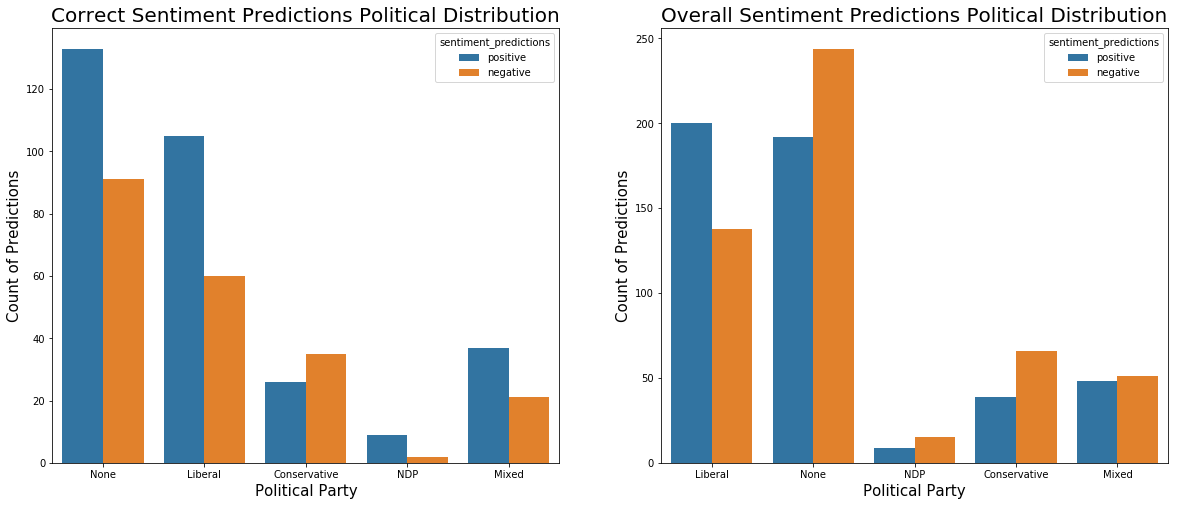


---------------------------------- Model Result ----------------------------------


Accuracy =  51.796%


<Figure size 432x288 with 0 Axes>

In [ ]:
# fig, axs = plt.subplots(1,2, figsize=(15,5))
# sns.set(font_scale=1.2)
plt.figure(figsize=(20,4*2))
gs = gridspec.GridSpec(1,2)

plt.subplot(gs[0])
ax1 = sns.countplot(x="political_party", data=df_elec_2[df_elec_2['sentiment_vs_pred'] == 'Correct_Prediction'], hue='sentiment_predictions')
ax1.set_title('Correct Sentiment Predictions Political Distribution', fontsize = 20)
ax1.set_xlabel('Political Party', fontsize = 15)
ax1.set_ylabel('Count of Predictions', fontsize = 15)
# ax1.set_ylim(0,900)

plt.subplot(gs[1])
ax2 = sns.countplot(x="political_party", data=df_elec_2, hue='sentiment_predictions')
ax2.set_title('Overall Sentiment Predictions Political Distribution', fontsize = 20)
ax2.set_xlabel('Political Party', fontsize = 15)
ax2.set_ylabel('Count of Predictions', fontsize = 15)
# ax2.set_ylim(0,900)

plt.show()
plt.tight_layout()

display(Markdown('\n---------------------------------- Model Result ----------------------------------\n'))
print('Accuracy = ', "{0:.3%}".format(logreg_tuned_elections_acc))

 **Observation:**

It is evident from the graphs that all three political parties have quite a lot positive sentiments expressed in tweets. 

However for the **Conservative party**, both the correct and overall predictions indicate that the predicted positive to negetive tweet ratio is really low(lowest predicted positive to negative tweet ratio of all). This means that the conservative party has a lot of negative sentiment compared to positive sentiment.

Moreover, the **Liberal Party**, although the party has many negetive tweet, the predicted overall positive to negtive tweet ratio is high compared to the Conservative party. Also, Liberal Party has the maximum number of predicted positive tweets amongst all three political parties.

Additionally, **NDP** has the best predicted positive to negative tweets ratio amongst all the three political parties. But,the totla number of twwet for the NDP is quite low to produce any quantifiable and measurbale impact to the predictions

**Model Predicted Result:**

The **Liberal Party** should win according to the predicted model as discussed in the section above.

**Actual Election Result 2021:**

The **Liberal Party** won the elections.

**Conclusion**

This shows that tweet **NLP analytics can be a very usefull tool** to help us predict that the outcome of the elections. The tweets represent the general opinion about the political parties, and performing tweet NLP can help the political parties to assess the public opinion and make reforms accordingly.

###**4.2 Model implementation on elections to classify 'Negative Reason' of election tweets**

In [ ]:
df_canadian_elec_all_negetive = df_elec_2[df_elec_2['sentiment']=='negative'][['negative_reason', 'cleaned_detokenized']]

In [ ]:
df_canadian_elec_all_negetive.head()

,negative_reason,cleaned_detokenized
0,calling election early,canadian election power grab pm trudeau opposi...
1,covid,hope trudeau loses canadian election tomorrow ...
3,calling election early,canadian friend forget trudeau year mandate ca...
5,covid,vaccine gun key election otoole serious plan c...
6,others,moderator respond leadership candidate debate ...


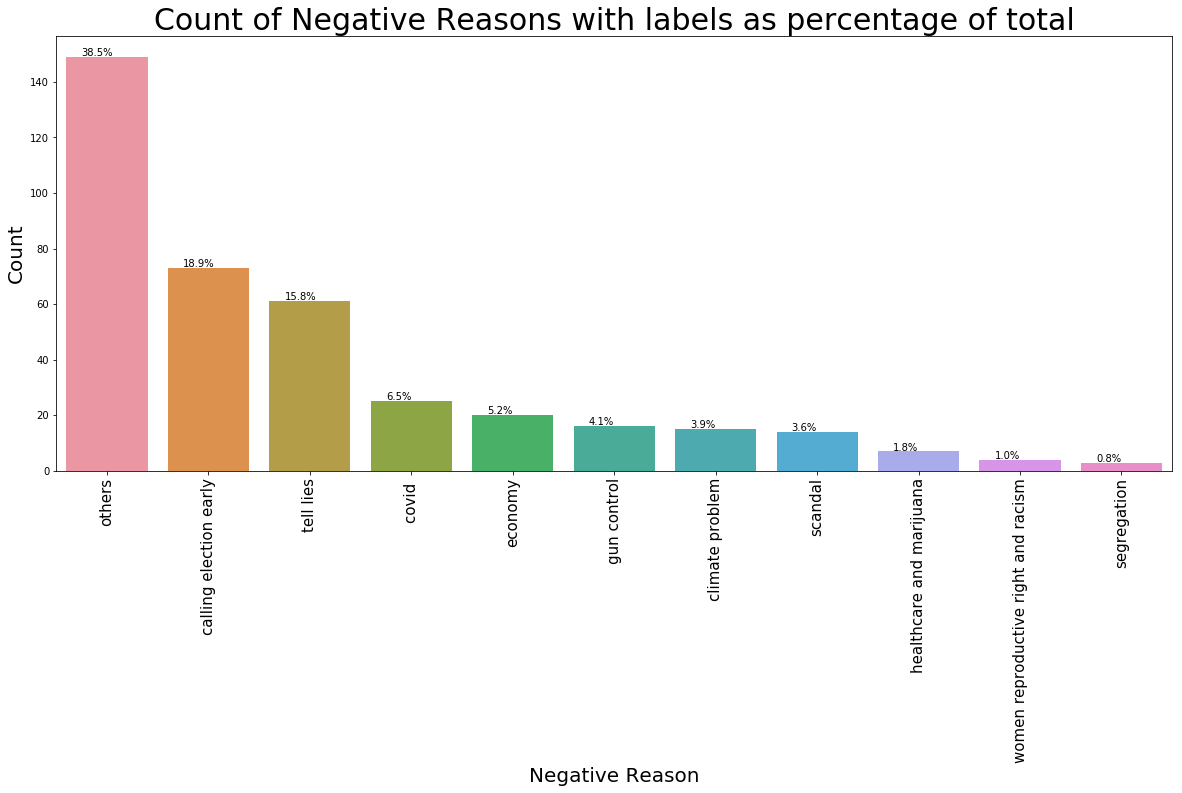

In [ ]:
plt.figure(figsize=(20,8))
# df_canadian_elec_all_negative['negative_reason'].value_counts()


ax3 = sns.countplot(x="negative_reason", data=df_canadian_elec_all_negetive, order = df_canadian_elec_all_negetive['negative_reason'].value_counts().index)
plt.xticks(rotation='vertical', fontsize="15")
ax3.set_xlabel('Negative Reason', fontsize = '20')
ax3.set_ylabel('Count', fontsize = '20')
ax3.set_title('Count of Negative Reasons with labels as percentage of total',  fontsize = '30')

for p, label in zip(ax3.patches, np.round(np.true_divide(df_canadian_elec_all_negetive['negative_reason'].value_counts().values, df_canadian_elec_all_negetive['negative_reason'].value_counts().sum()),3)):
    ax3.annotate("{0:.1%}".format(label), (p.get_x()+0.15, p.get_height()+0.4))

Observation:
It can be observed from the table above that the data is skewed for the last 5 categories which represent a very low percentage of the total. Hence we can combine a few categories

Categories =

1. Calling election early

2. Exploitation = 'Tell Lies' + 'Scandal' + 'segregation' - Reason being : They all form a part of manipultion by leaders

3. Economy = 'economy' + 'covid' - Reason being : COVID has officially become a reason for downfall of ecomomy

4. Healthcare = 'Women Reproductive right and Racism' + 'Healthcare and Marijuana' - Reason being : They all relate to healthcare and wellness of the public

5. Gun control

6. Climate Problem

7. Others

In [ ]:
df_canadian_elec_all_negetive['negative_reason'].unique()

array(['calling election early', 'covid ', 'others', 'scandal',
       'tell lies', 'gun control', 'economy', 'healthcare and marijuana',
       'segregation', 'women reproductive right and racism',
       'climate problem'], dtype=object)

Combining negative reason Categories:

In [ ]:
df_canadian_elec_allnegetive_combined = copy.deepcopy(df_canadian_elec_all_negetive)

df_canadian_elec_allnegetive_combined['combined_reason'] = df_canadian_elec_allnegetive_combined['negative_reason'].map({'calling election early':'Calling Off',
                                                                                                               'tell lies':'Exploitation',
                                                                                                                'scandal':'Exploitation',
                                                                                                                'segregation':'Exploitation',
                                                                                                               'economy':'Economy',
                                                                                                                'covid ':'Economy',      
                                                                                                               'women reproductive right and racism':'Healthcare',
                                                                                                               'healthcare and marijuana':'Healthcare',
                                                                                                               'climate problem':'Climate Problem', 
                                                                                                                'gun control':'gun control',
                                                                                                               'others':'Others'})

In [ ]:
df_canadian_elec_allnegetive_combined

,negative_reason,cleaned_detokenized,combined_reason
0,calling election early,canadian election power grab pm trudeau opposi...,Calling Off
1,covid,hope trudeau loses canadian election tomorrow ...,Economy
3,calling election early,canadian friend forget trudeau year mandate ca...,Calling Off
5,covid,vaccine gun key election otoole serious plan c...,Economy
6,others,moderator respond leadership candidate debate ...,Others
7,others,ive skeptical critical mainstream canadian jou...,Others
10,scandal,time close eye brain start thinking toole kenn...,Exploitation
11,calling election early,wanted election erin otoole jagmeet singh cana...,Calling Off
16,scandal,misspoke earlier scandal ethic commissioner cl...,Exploitation
18,covid,canada unjabbed canadian issue election friend...,Economy


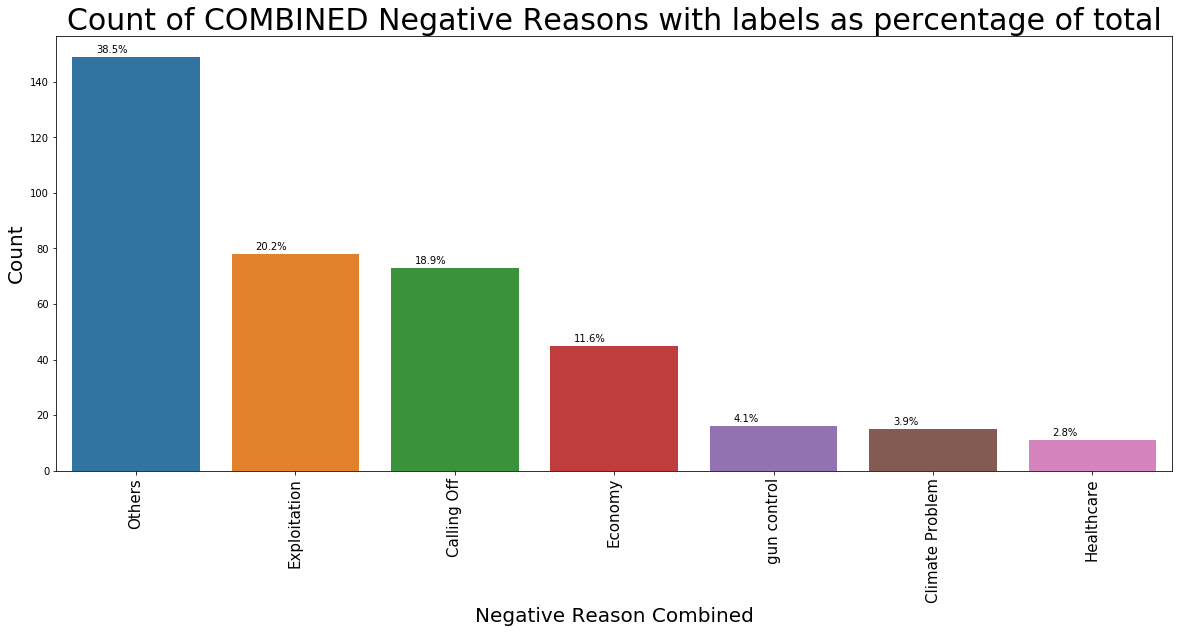

In [ ]:
plt.figure(figsize=(20,8))
# df_canadian_elec_all_negative['negative_reason'].value_counts()

ax4 = sns.countplot(x="combined_reason", data=df_canadian_elec_allnegetive_combined, order = df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().index)
plt.xticks(rotation='vertical', fontsize="15")
ax4.set_xlabel('Negative Reason Combined', fontsize = '20')
ax4.set_ylabel('Count', fontsize = '20')
ax4.set_title('Count of COMBINED Negative Reasons with labels as percentage of total',  fontsize = '30')

for p, label in zip(ax4.patches, np.round(np.true_divide(df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().values, df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().sum()),3)):
    ax4.annotate("{0:.1%}".format(label), (p.get_x()+0.15, p.get_height()+1.5))

**Observation:** The data looks much better now and can be further processed for classification



Implimenting classification models

Performing TF (Bag of words) (since it was the best performing word processing model for the previous section)

In [ ]:
neg_map = {'Others':0, 'Exploitation':1, 'Calling Off':2, 'Economy':3,'gun control':4,'Climate Problem':5,'Healthcare':6} # encoding

X_elec_negcombined = df_canadian_elec_allnegetive_combined['cleaned_detokenized']
y_elec_negcombined = df_canadian_elec_allnegetive_combined.replace({'combined_reason': neg_map})['combined_reason']

In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text
count_vect_elec_negcomb = CountVectorizer(max_features = 1000)

# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
X_elec_negcombined_tf = count_vect_elec_negcomb.fit_transform(X_elec_negcombined)

X_elec_negcombined_tf_print = pd.DataFrame(np.round(X_elec_negcombined_tf.toarray(), 3), columns = count_vect_elec_negcomb.get_feature_names())
X_elec_negcombined_tf_print.head()

,aa,ableg,absolutely,account,accountable,action,ad,address,advocating,afghanistan,...,year,yeg,yelled,yeshis,yesterday,yo,youknowwho,younger,youwe,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Implementation and Results (logistic regression + XGBoost + Random Forest + Decision Tree + Linear SVC) with hyperparameter tuning and cross validation

In [ ]:
logreg_report_elecnegcomb, logreg_acc_elecnegcomb, logreg_confusion_elecnegcomb, logreg_f1_score_elecnegcomb, logreg_pred_elecnegcomb, logreg_bs_elecnegcomb,logreg_bp_elecnegcomb = logisticreg(X_elec_negcombined_tf, y_elec_negcombined, test_size=0.3, param = {'C':[0.1,0.5,0.2,1], 'solver': ('lbfgs', 'saga')}, cv=3)

In [ ]:
xgboost_model_report_elecnegcomb, xgboost_model_acc_elecnegcomb, xgboost_model_confusion_elecnegcomb, xgboost_model_f1_score_elecnegcomb, xgboost_model_pred_elecnegcomb, xgboost_model_bs_elecnegcomb, xgboost_model_bp_elecnegcomb = XGBoost(X_elec_negcombined_tf, y_elec_negcombined, param = {'learning_rate':[0.01, 0.1, 1, 1.5]}, cv = 3, test_size=0.3)

[23:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
random_forest_report_elecnegcomb, random_forest_acc_elecnegcomb, random_forest_confusion_elecnegcomb, random_forest_f1_score_elecnegcomb, random_forest_pred_elecnegcomb, random_forest_bs_elecnegcomb,random_forest_bp_elecnegcomb = randomforest(X_elec_negcombined_tf, y_elec_negcombined, param = {'criterion':['gini', 'entropy'], 'n_estimators': [100]}, cv = 3, test_size=0.3)

In [ ]:
decision_trees_report_elecnegcomb, decision_trees_acc_elecnegcomb, decision_trees_confusion_elecnegcomb, decision_trees_f1_score_elecnegcomb, decision_trees_pred_elecnegcomb, decision_trees_bs_elecnegcomb,decision_trees_bp_elecnegcomb = decisiontrees(X_elec_negcombined_tf, y_elec_negcombined, param = {'criterion':['gini', 'entropy']}, cv=3, test_size=0.3)

In [ ]:
linear_svc_report_elecnegcomb, linear_svc_acc_elecnegcomb, linear_svc_confusion_elecnegcomb, linear_svc_f1_score_elecnegcomb, linear_svc_pred_elecnegcomb, linear_svc_bs_elecnegcomb,linear_svc_bp_elecnegcomb = linearsvc(X_elec_negcombined_tf, y_elec_negcombined, param = {'C':[0.01,0.1,0.5,0.2,1]}, cv = 3, test_size=0.3)

In [ ]:
print('\n ---------------------- Term Frequency Log. Regression Model ----------------------\n')
print(logreg_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(logreg_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(logreg_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',logreg_confusion_elecnegcomb)
print('\n Best Tuning Score is =', logreg_bs_elecnegcomb)
print('\n Best Parameters are =', logreg_bp_elecnegcomb)

print('\n ---------------------- Term Frequency Random Forest Model ----------------------\n')
print(random_forest_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(random_forest_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(random_forest_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',random_forest_confusion_elecnegcomb)
print('\n Best Tuning Score is =', random_forest_bs_elecnegcomb)
print('\n Best Parameters are =', random_forest_bp_elecnegcomb)

print('\n ---------------------- Term Frequency XG Boost Model ----------------------\n')
print(xgboost_model_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(xgboost_model_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(xgboost_model_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',xgboost_model_confusion_elecnegcomb)
print('\n Best Tuning Score is =', xgboost_model_bs_elecnegcomb)
print('\n Best Parameters are =', xgboost_model_bp_elecnegcomb)

print('\n ---------------------- Term Frequency Decision Tree Model ----------------------\n')
print(decision_trees_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(decision_trees_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(decision_trees_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',decision_trees_confusion_elecnegcomb)
print('\n Best Tuning Score is =', decision_trees_bs_elecnegcomb)
print('\n Best Parameters are =', decision_trees_bp_elecnegcomb)

print('\n ---------------------- Term Frequency SVM Model ----------------------\n')
print(linear_svc_report_elecnegcomb)
print('Accuracy = ', "{0:.3%}".format(linear_svc_acc_elecnegcomb))
print('F1 Score = ', "{0:.3%}".format(linear_svc_f1_score_elecnegcomb), '\n')
print('Confusion Matrix --------\n',linear_svc_confusion_elecnegcomb)
print('\n Best Tuning Score is =', linear_svc_bs_elecnegcomb)
print('\n Best Parameters are =', linear_svc_bp_elecnegcomb)


 ---------------------- Term Frequency Log. Regression Model ----------------------

              precision    recall  f1-score   support

           0       0.53      0.87      0.66        45
           1       0.31      0.21      0.25        24
           2       0.63      0.55      0.59        22
           3       0.50      0.14      0.22        14
           4       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3

   micro avg       0.52      0.52      0.52       117
   macro avg       0.39      0.34      0.34       117
weighted avg       0.48      0.52      0.47       117

Accuracy =  52.137%
F1 Score =  46.853% 

Confusion Matrix --------
 [[39  4  1  0  1  0  0]
 [17  5  1  1  0  0  0]
 [ 6  3 12  1  0  0  0]
 [ 4  3  5  2  0  0  0]
 [ 2  0  0  0  3  0  0]
 [ 4  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0]]

 Best Tuning Score is = 0.5074074074074074

 Best Parameters are = {'C': 0.5, 

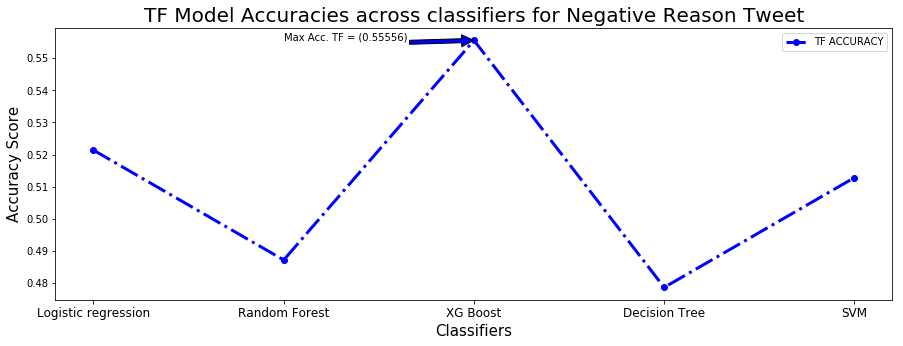

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

tf_acc_scores_negcomb = [logreg_acc_elecnegcomb, random_forest_acc_elecnegcomb, xgboost_model_acc_elecnegcomb, decision_trees_acc_elecnegcomb, 
                 linear_svc_acc_elecnegcomb]

classifiers_list_negcomb = ['Logistic regression', 'Random Forest', 'XG Boost', 'Decision Tree', 'SVM'] 

plt.subplot(1,1,1)
plt.plot(classifiers_list_negcomb, tf_acc_scores_negcomb, marker='o', color='b', linestyle='-.', linewidth=3, label = 'TF ACCURACY')
plt.xticks(np.arange(0,5,1), rotation=0, fontsize=12)
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('TF Model Accuracies across classifiers for Negative Reason Tweet', fontsize = '20')

ymax_negcomb = max(np.asarray(tf_acc_scores_negcomb, dtype=np.float32))
xmax_negcomb = np.where(tf_acc_scores_negcomb == np.amax(np.asarray(tf_acc_scores_negcomb)))[0]
plt.annotate('Max Acc. TF = (%.5f)'%(np.amax(np.asarray(tf_acc_scores_negcomb))), xy=(xmax_negcomb, ymax_negcomb), 
             xytext=(xmax_negcomb-1, ymax_negcomb+0), arrowprops=dict(facecolor='b', shrink = 0.005, frac=0.1))


plt.legend()
plt.show()
    

We can clearly see from the bovve graph that the best model is XG bosst wiht aan accuracy of 55.55%

In [ ]:
df_canadian_elec_allnegetive_combined.head()

,negative_reason,cleaned_detokenized,combined_reason
0,calling election early,canadian election power grab pm trudeau opposi...,Calling Off
1,covid,hope trudeau loses canadian election tomorrow ...,Economy
3,calling election early,canadian friend forget trudeau year mandate ca...,Calling Off
5,covid,vaccine gun key election otoole serious plan c...,Economy
6,others,moderator respond leadership candidate debate ...,Others


In [ ]:
df_canadian_elec_allnegetive_combined['negative_reason_pred'] = xgboost_model_pred_elecnegcomb
neg_map_rev = {0:'Others', 1:'Exploitation', 2:'Calling Off', 3:'Economy',4:'gun control',5:'Climate Problem',6:'Healthcare'} # encoding
df_canadian_elec_allnegetive_combined = df_canadian_elec_allnegetive_combined.replace({'negative_reason_pred': neg_map_rev})

In [ ]:
df_canadian_elec_allnegetive_combined.head()

,negative_reason,cleaned_detokenized,combined_reason,negative_reason_pred
0,calling election early,canadian election power grab pm trudeau opposi...,Calling Off,Calling Off
1,covid,hope trudeau loses canadian election tomorrow ...,Economy,Economy
3,calling election early,canadian friend forget trudeau year mandate ca...,Calling Off,Calling Off
5,covid,vaccine gun key election otoole serious plan c...,Economy,gun control
6,others,moderator respond leadership candidate debate ...,Others,Others


In [ ]:
## making a dataframe of negative reasons correct predictions
df_canadian_elec_allnegetive_combined['political_party'] = df_elec_2[df_elec_2['sentiment']=='negative']['political_party']
df_canadian_elec_allnegetive_combined['combined_neg_reason_VS_prediction'] = 0

for i in df_canadian_elec_allnegetive_combined.index:
    if df_canadian_elec_allnegetive_combined['combined_reason'][i] == df_canadian_elec_allnegetive_combined['negative_reason_pred'][i]:
        df_canadian_elec_allnegetive_combined['combined_neg_reason_VS_prediction'][i] = 'Correct_Prediction'
    else:
        df_canadian_elec_allnegetive_combined['combined_neg_reason_VS_prediction'][i] = 'Wrong_Prediction'


df_canadian_elec_allnegetive_combined.head()

,negative_reason,cleaned_detokenized,combined_reason,negative_reason_pred,political_party,combined_neg_reason_VS_prediction
0,calling election early,canadian election power grab pm trudeau opposi...,Calling Off,Calling Off,Liberal,Correct_Prediction
1,covid,hope trudeau loses canadian election tomorrow ...,Economy,Economy,Liberal,Correct_Prediction
3,calling election early,canadian friend forget trudeau year mandate ca...,Calling Off,Calling Off,Liberal,Correct_Prediction
5,covid,vaccine gun key election otoole serious plan c...,Economy,gun control,None,Wrong_Prediction
6,others,moderator respond leadership candidate debate ...,Others,Others,None,Correct_Prediction


Accuracy achieved by XG Boost for Negative Reasons = 55.55% on negative reason classification

##**5. Discussion**

###**5.1 Sentiment Prediction of the Canadian Election Tweets**

Text(0, 0.5, 'Count of Predictions')

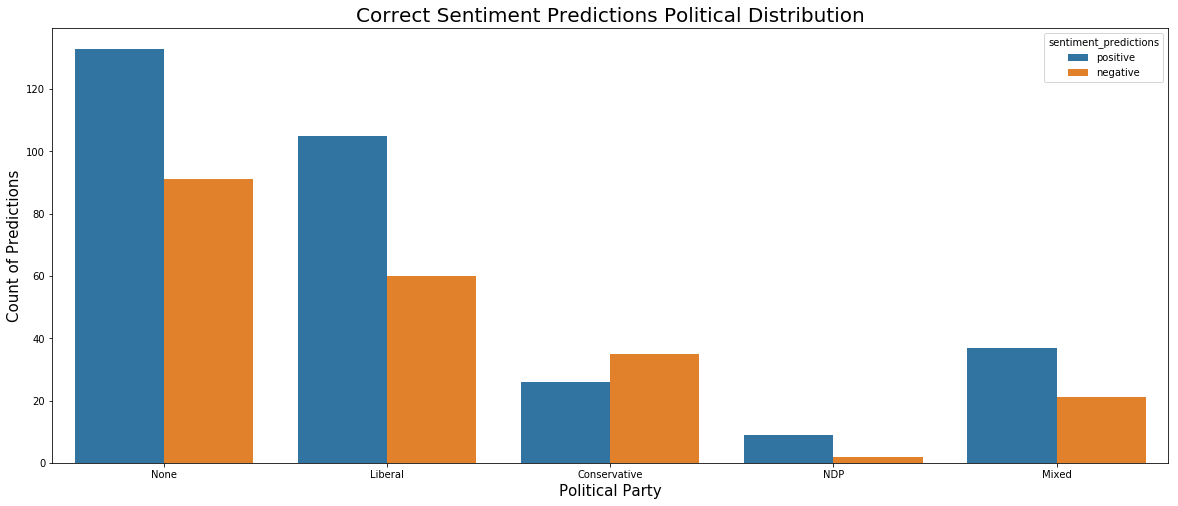

In [ ]:
plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,1)

plt.subplot(gs[0])
ax1 = sns.countplot(x="political_party", data=df_elec_2[df_elec_2['sentiment_vs_pred'] == 'Correct_Prediction'], hue='sentiment_predictions')
ax1.set_title('Correct Sentiment Predictions Political Distribution', fontsize = 20)
ax1.set_xlabel('Political Party', fontsize = 15)
ax1.set_ylabel('Count of Predictions', fontsize = 15)


Through the Neuro-linguistic programming(NLP) analysis of the twitter tweets(with both popsitve and negetaive sentiments), observed that the Conservative party had a low positive to negetaive ratio(higher negative sentiment presence with respect to positive). Moreover, Liberal party had a lower negative tweet count than the Conservative party, and they also had the maximum number of positive tweets out of all three parties. Although, NDP had good negative to positive tweet ratio, but their overall presence over twitter was quite low suggesting low popularity amongst the public.

Additionally, the total positive sentiments of the None and Mixed categories crossed the combined positives sentiments of all the three parties, this suggests that the public was somewhat satisfied with the existing governemnt; that is the Liberal Party. Therefore, the NLP analysis suggests that Liberal Party has a more chances of winning according to the twitter data.

Therefore, all these tweets from twittet act as an pointer of what shapes the political landscape. adn this refelcted in the elctions result as well, as suggested by our NLP analysis, the Liberal Party won.

###**5.2 Can the model fail?**

Text(0.5, 1.0, 'Correctly predicted negative reasons COMBINED categories')

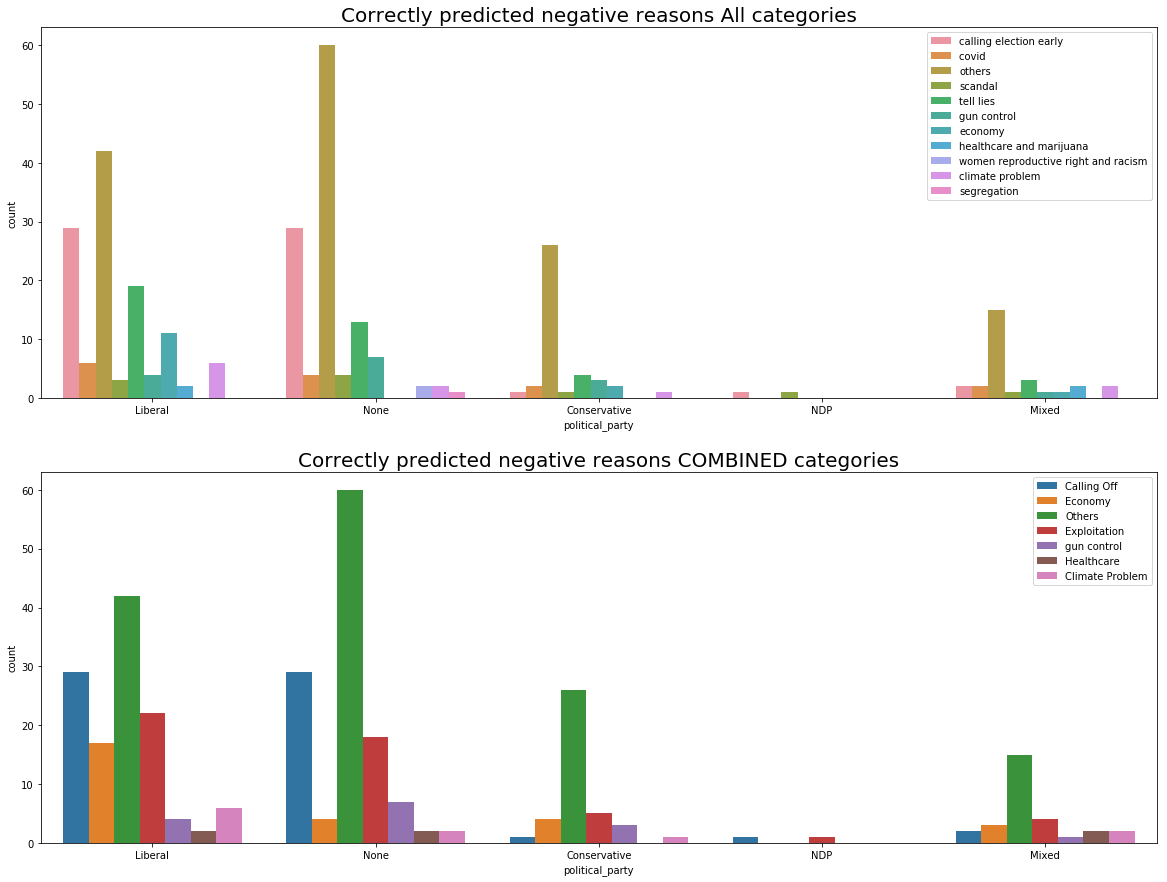

In [ ]:
## Looking at the distribution of negative tweets in correct predictions
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2,1)

plt.subplot(gs[0])
# plt.figure(figsize=(20,8))
ax = sns.countplot(x="political_party", data=df_canadian_elec_allnegetive_combined[(df_canadian_elec_allnegetive_combined['combined_neg_reason_VS_prediction']=='Correct_Prediction')], hue='negative_reason')
plt.legend(loc='upper right')
ax.set_title('Correctly predicted negative reasons All categories', fontsize = '20')

plt.subplot(gs[1])
ax1 = sns.countplot(x="political_party", data=df_canadian_elec_allnegetive_combined[(df_canadian_elec_allnegetive_combined['combined_neg_reason_VS_prediction']=='Correct_Prediction')], hue='negative_reason_pred')
plt.legend(loc='upper right')
ax1.set_title('Correctly predicted negative reasons COMBINED categories', fontsize = '20')

But despite the correct prediction so far, the model may fail to make predictions correcty, being the achieved accuracy as 55.55%. To assess this lets explore the models dataset more to substantiate the answer

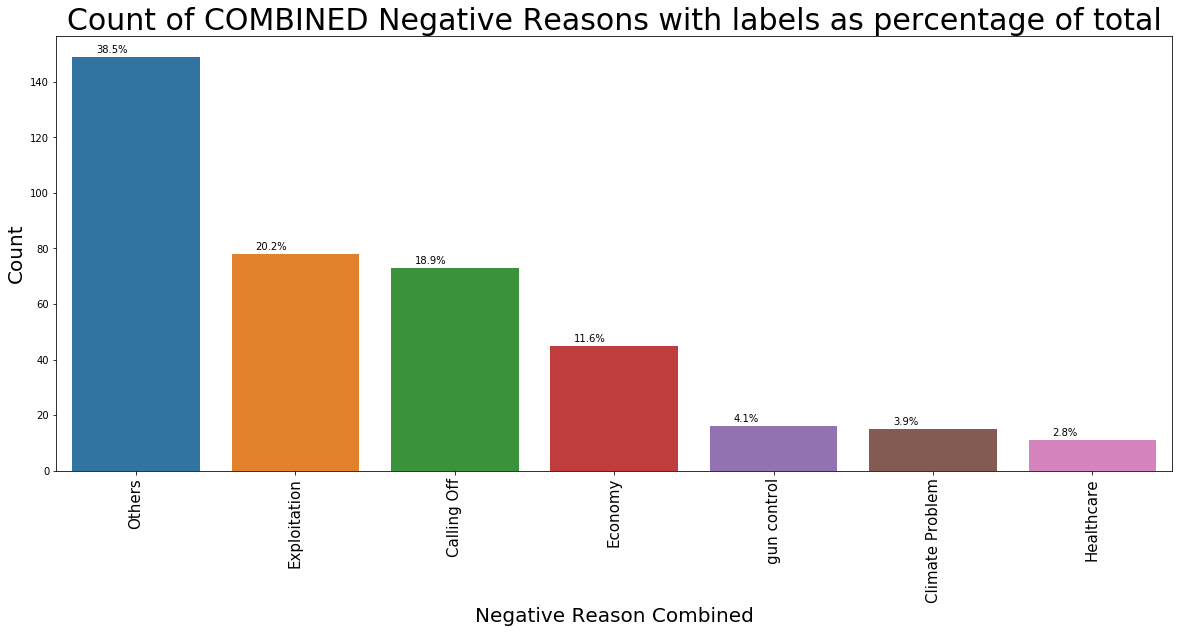

In [ ]:
## Number of Samples - 
plt.figure(figsize=(20,8))
# df_canadian_elec_all_negative['negative_reason'].value_counts()

ax4 = sns.countplot(x="combined_reason", data=df_canadian_elec_allnegetive_combined, order = df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().index)
plt.xticks(rotation='vertical', fontsize="15")
ax4.set_xlabel('Negative Reason Combined', fontsize = '20')
ax4.set_ylabel('Count', fontsize = '20')
ax4.set_title('Count of COMBINED Negative Reasons with labels as percentage of total',  fontsize = '30')

for p, label in zip(ax4.patches, np.round(np.true_divide(df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().values, df_canadian_elec_allnegetive_combined['combined_reason'].value_counts().sum()),3)):
    ax4.annotate("{0:.1%}".format(label), (p.get_x()+0.15, p.get_height()+1.5))

**Observation:**
Fro the above data set we can see that it containes skewed data, with the categories like Healthcare, Gun Control and Climate Problems have very few samples each, whereas, the other categories have an average of 160 categories each. This may cause a bias in the learning algorithm for it would be generalised on the categories with maximum frequency ('Others', 'Exploitation')

In [ ]:
## Generating 3 random samples
samples1=df_canadian_elec_allnegetive_combined.sample(5, random_state=1624)

## Printing Actual reason vs Predicted reason
samples1[['combined_reason','negative_reason_pred', 'combined_neg_reason_VS_prediction']]

,combined_reason,negative_reason_pred,combined_neg_reason_VS_prediction
87,Others,Others,Correct_Prediction
819,Climate Problem,Climate Problem,Correct_Prediction
835,Others,Others,Correct_Prediction
945,Others,Others,Correct_Prediction
382,Exploitation,Others,Wrong_Prediction


As we can see that the random sample has 1 wrong prediction for the index 382. Lets Explore what the tweet was...

In [ ]:
## Printing the tweet for the incorrect prediction (index no. 181)
samples1['cleaned_detokenized'][382]

'canadian caught russiatrump election meddling kind meddling american meddle election cuz obama cool elxn'

It is evident from the tweet above that it fall under 'Exploitation' category for elections but our model predicted 'Others'.This can happen since we got a few samples in exploitation class when comapred to Others and we get a lower accuracy of the model

###**5.3 Top-50 most frequent POSITIVE non-stopwords in the Canadian elections data**

In [ ]:
h = df_elec_1[['sentiment','cleaned_detokenized']]
pos = h[h['sentiment'] == 'positive']
ne = h[h['sentiment'] == 'negative']
text_pos = pos['cleaned_detokenized'].values.tolist()
text_neg = ne['cleaned_detokenized'].values.tolist()


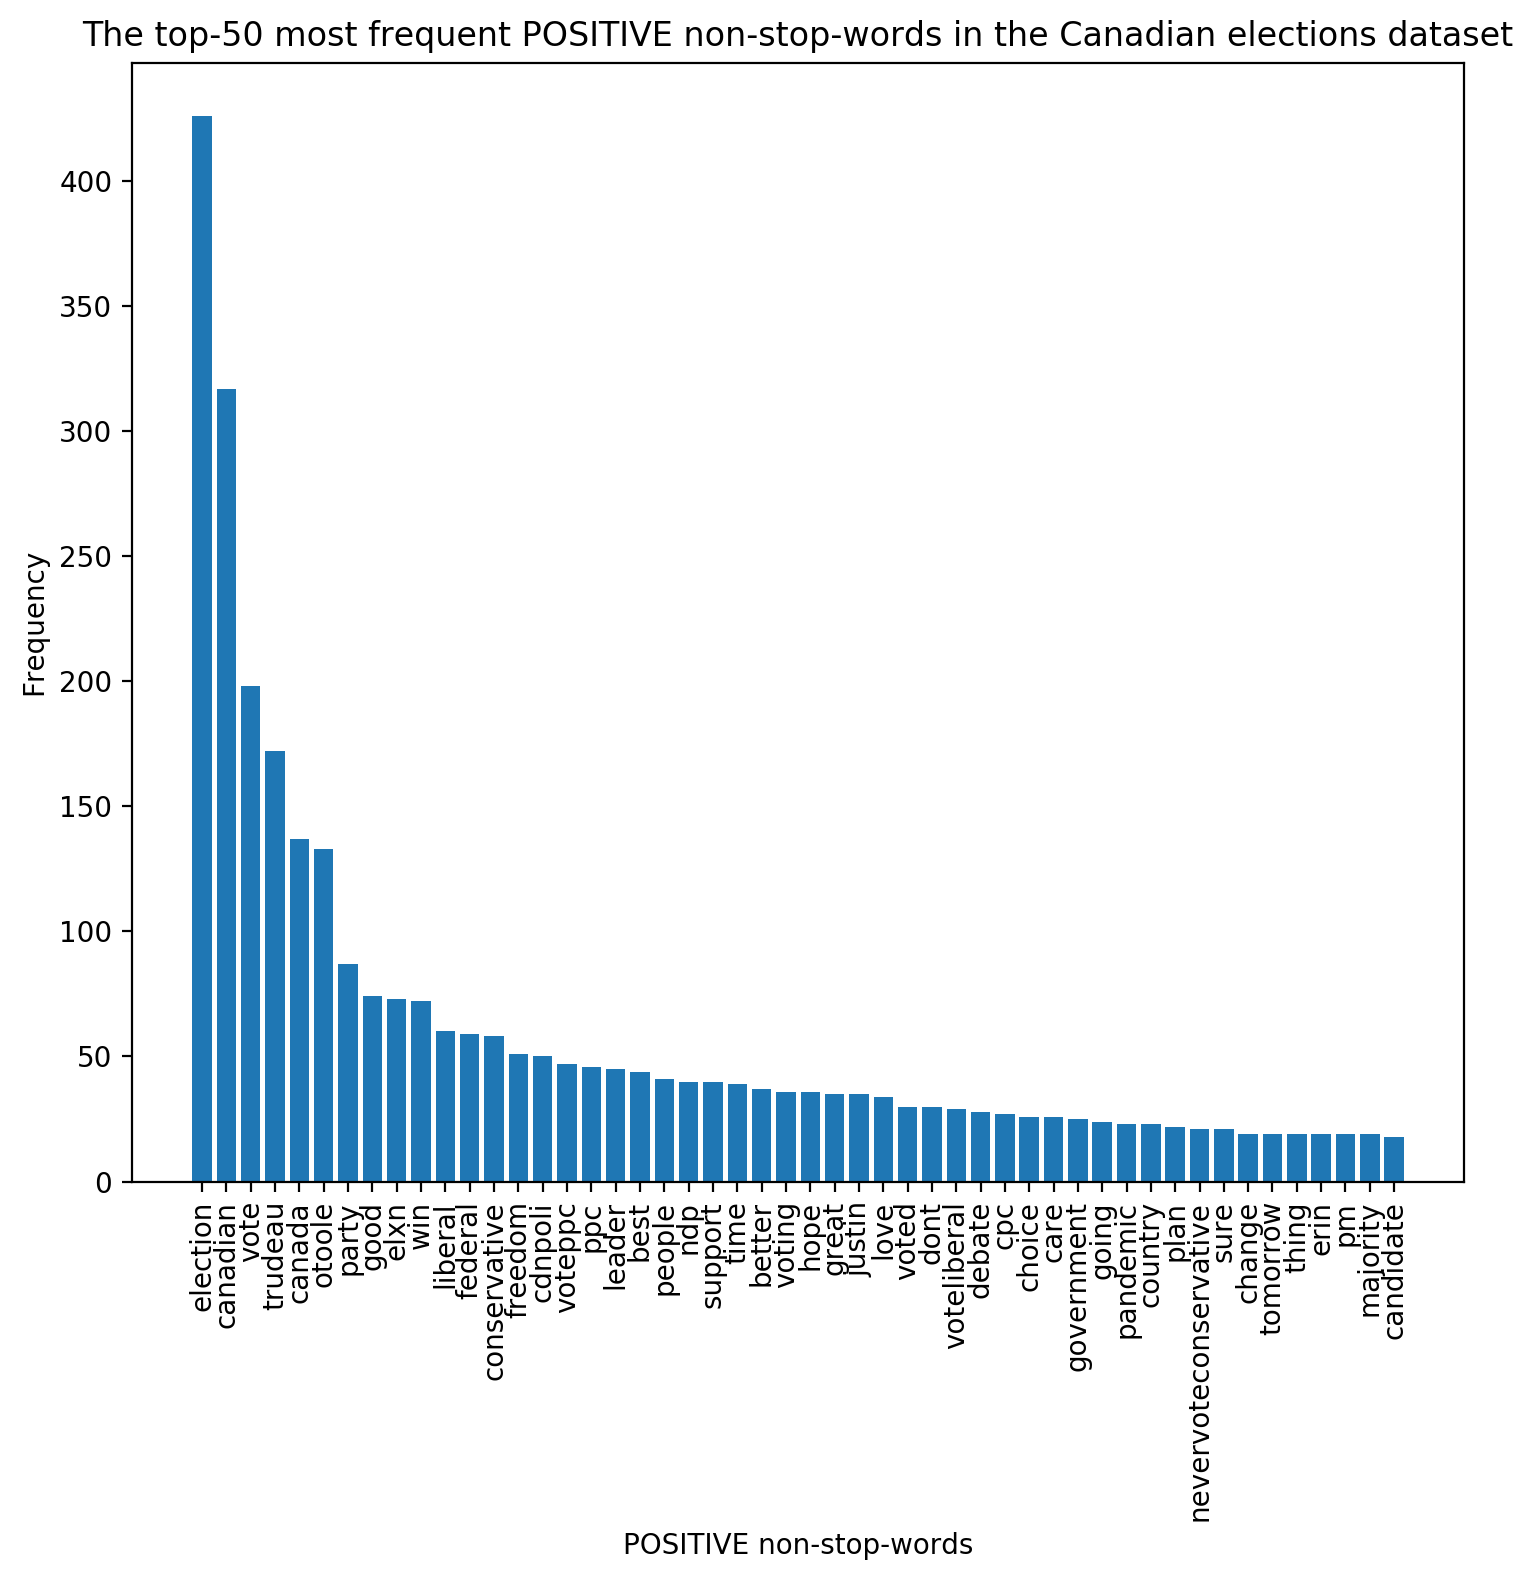

In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text - Bag of words
## for positive tweets##

## initializing for the first 50 features
countvect_forlast = CountVectorizer(max_features=50)
# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
mostwords_pos = countvect_forlast.fit_transform(text_pos)
mostwords_pos_df = pd.DataFrame(np.round(mostwords_pos.toarray(), 4), columns = countvect_forlast.get_feature_names())

from matplotlib.pyplot import figure
mostwords_pos_df.loc['Total'] = mostwords_pos_df.sum()
g = mostwords_pos_df.loc['Total']
k = g.sort_values(ascending=False)
figure(figsize=(8,8), dpi=200)
plt.bar(k.index, k.values)
plt.title('The top-50 most frequent POSITIVE non-stop-words in the Canadian elections dataset')
plt.xlabel('POSITIVE non-stop-words')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

###**5.4 Top-50 most frequent NEGATIVE non-stopwords in the Canadian elections data**

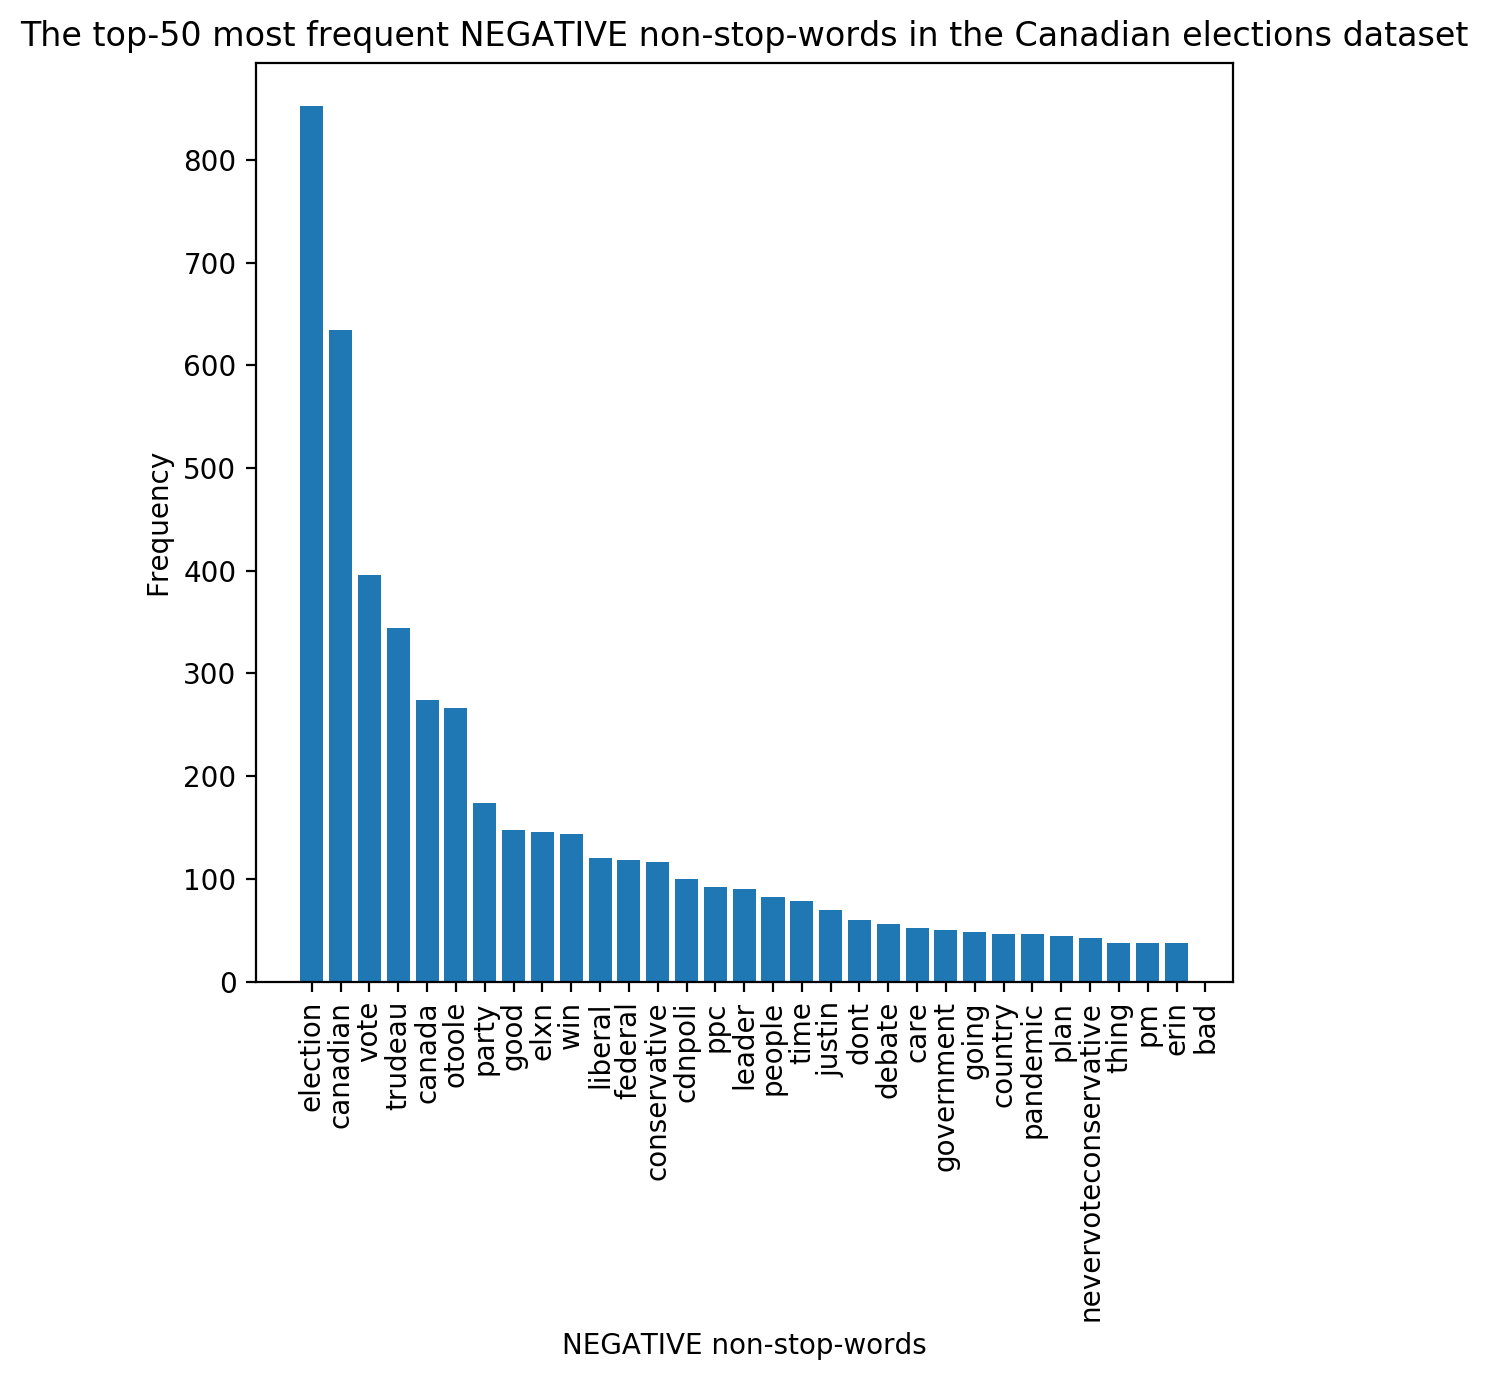

In [ ]:
# CountVectorizer from scikit-learn is used for counting tokens in a collection of text - Bag of words
## for negetive tweets##

## initializing for the first 50 features
countvect_forlast = CountVectorizer(max_features=50)
# We fit our Vectorizer on our cleaned text and create a dataframe for the word frequencies
mostwords_neg = countvect_forlast.fit_transform(text_neg)
mostwords_neg_df = pd.DataFrame(np.round(mostwords_neg.toarray(), 4), columns = countvect_forlast.get_feature_names())

from matplotlib.pyplot import figure
mostwords_neg_df.loc['Total'] = mostwords_pos_df.sum()
g = mostwords_neg_df.loc['Total']
k = g.sort_values(ascending=False)
figure(figsize=(7,7), dpi=200)
plt.bar(k.index, k.values)
plt.title('The top-50 most frequent NEGATIVE non-stop-words in the Canadian elections dataset')
plt.xlabel('NEGATIVE non-stop-words')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()